#Imports

In [ ]:

#time series imports
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

import fbprophet #used for forecasting
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt



# visualizations

#!pip install bar_chart_race
import plotly
import plotly.offline as py
#py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as fig_fact
#plotly.tools.set_config_file(world_readable=True, sharing='public')
#import mpl_toolkits.basemap
#from mpl_toolkits.basemap import Basemap
#import folium
#import folium.plugins as plugins

%matplotlib inline

#fitter package for fitting statistical distributions to data
!pip install fitter
import fitter
from fitter import Fitter, get_common_distributions, get_distributions

#usual packages
import warnings
import numpy as np
import pandas as pd
from math import pi
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
#from IPython.display import HTML,display

warnings.filterwarnings("ignore")




/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 47 kB 3.6 MB/s 
  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25025 sha256=78ae5242cddd27663282e11928c6807bb445ff8b7387eafd204720bb2de0414c
  Stored in directory: /root/.cache/pip/wheels/e1/98/16/e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=73f9f1cca87de5f4582cbed9768366b5cd9a9f746b9371c41930bf5dd8cf5d9b
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev


##Loading the Data

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:

#parses the urls to move files from google drive into colab workspace

URL = 'https://drive.google.com/file/d/1hekc4rp5M1SGVr8VJhDFYQRZ3hT9-X0n/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('S02_2000.csv')


URL1 = 'https://drive.google.com/file/d/1pCtDlh-Ywz9KHiDd9wRiDc0JrBqQl9xm/view?usp=sharing'
path1 = URL1.split('/')[-2]
fileDownloaded1 = drive.CreateFile({'id': path1})
fileDownloaded1.GetContentFile('S02_2001.csv')

URL2 = 'https://drive.google.com/file/d/1x_d5acjhSCbuHaZZPGVLmjBPjg7BOtG2/view?usp=sharing'
path2 = URL2.split('/')[-2]
fileDownloaded2 = drive.CreateFile({'id': path2})
fileDownloaded2.GetContentFile('S02_2002.csv')

URL3 = 'https://drive.google.com/file/d/1vXats31SaQ0QOKaltVyHXFg_lcRITqvD/view?usp=sharing'
path3 = URL3.split('/')[-2]
fileDownloaded3 = drive.CreateFile({'id': path3})
fileDownloaded3.GetContentFile('S02_2003.csv')

URL4 = 'https://drive.google.com/file/d/1w0vaRlt_PGXRjVXcnz94MRRkYSI3HKGU/view?usp=sharing'
path4 = URL4.split('/')[-2]
fileDownloaded4 = drive.CreateFile({'id': path4})
fileDownloaded4.GetContentFile('S02_2004.csv')

URL5 = 'https://drive.google.com/file/d/1twVYm8ZAadpPVBtrB8Qv9zDZpLpubHVN/view?usp=sharing'
path5 = URL5.split('/')[-2]
fileDownloaded5 = drive.CreateFile({'id': path5})
fileDownloaded5.GetContentFile('S02_2005.csv')

URL6 = 'https://drive.google.com/file/d/1j2cdUDWHthfutzn9OJsSSVapot3FqnZ0/view?usp=sharing'
path6 = URL6.split('/')[-2]
fileDownloaded6 = drive.CreateFile({'id': path6})
fileDownloaded6.GetContentFile('S02_2006.csv')

URL7 = 'https://drive.google.com/file/d/1Fwti-TNT5DrGJel2o4JjCbdvCAZAntvV/view?usp=sharing'
path7 = URL7.split('/')[-2]
fileDownloaded7 = drive.CreateFile({'id': path7})
fileDownloaded7.GetContentFile('S02_2007.csv')

URL8 = 'https://drive.google.com/file/d/13E9rfuZUYSIXM1dFoyWlSlOi8ljgoQi_/view?usp=sharing'
path8 = URL8.split('/')[-2]
fileDownloaded8 = drive.CreateFile({'id': path8})
fileDownloaded8.GetContentFile('S02_2008.csv')

URL9 = 'https://drive.google.com/file/d/1LrMGdK6JqCQcafcOyaDi6K4cYhvxUfXA/view?usp=sharing'
path9 = URL9.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path9})
fileDownloaded.GetContentFile('S02_2009.csv')

URL10 = 'https://drive.google.com/file/d/1S9nALohqjpkJFjMTpj7svE1MUuXQYHcB/view?usp=sharing'
path10 = URL10.split('/')[-2]
fileDownloaded10 = drive.CreateFile({'id': path10})
fileDownloaded10.GetContentFile('S02_2010.csv')

URL11 = 'https://drive.google.com/file/d/1Z_Yt6kHJCBc7qAe2QPLXGPe47W0_Glye/view?usp=sharing'
path11 = URL11.split('/')[-2]
fileDownloaded11 = drive.CreateFile({'id': path11})
fileDownloaded11.GetContentFile('S02_2011.csv')

URL12 = 'https://drive.google.com/file/d/1PhDs5z-obFMptWxO6J0hCOfXdEpXygqE/view?usp=sharing'
path12 = URL12.split('/')[-2]
fileDownloaded12 = drive.CreateFile({'id': path12})
fileDownloaded12.GetContentFile('S02_2012.csv')

URL13 = 'https://drive.google.com/file/d/1iMpejJwWscRXDrnj-IViDWMMH6irWJ1z/view?usp=sharing'
path13 = URL13.split('/')[-2]
fileDownloaded13 = drive.CreateFile({'id': path13})
fileDownloaded13.GetContentFile('S02_2013.csv')

URL14 = 'https://drive.google.com/file/d/12b6PXF02WuEAabodtEyRh6Sh2jLfvh6p/view?usp=sharing'
path14 = URL14.split('/')[-2]
fileDownloaded14 = drive.CreateFile({'id': path14})
fileDownloaded14.GetContentFile('S02_2014.csv')

URL15 = 'https://drive.google.com/file/d/1IKUUMToEEoQBR5gB_v79TD7_FEU_wmyj/view?usp=sharing'
path15 = URL15.split('/')[-2]
fileDownloaded15 = drive.CreateFile({'id': path15})
fileDownloaded15.GetContentFile('S02_2015.csv')

URL16 = 'https://drive.google.com/file/d/1XJGpEwA9Niywxz_cWItmvUmjClaCfh_1/view?usp=sharing'
path16 = URL16.split('/')[-2]
fileDownloaded16 = drive.CreateFile({'id': path16})
fileDownloaded16.GetContentFile('S02_2016.csv')

URL17 = 'https://drive.google.com/file/d/1KA4wHk68GNuFfjY_CvADkbWYE_Q5PtgZ/view?usp=sharing'
path17 = URL17.split('/')[-2]
fileDownloaded17 = drive.CreateFile({'id': path17})
fileDownloaded17.GetContentFile('S02_2017.csv')

URL18 = 'https://drive.google.com/file/d/1s0-8uQ8GFvgn9qH6DMdPFY4VsDazfJM0/view?usp=sharing'
path18 = URL18.split('/')[-2]
fileDownloaded18 = drive.CreateFile({'id': path18})
fileDownloaded18.GetContentFile('S02_2018.csv')


URL19 = 'https://drive.google.com/file/d/1e2zDdGIolvrnUtIcnBQqd9cr42D60RKh/view?usp=sharing'
path19 = URL19.split('/')[-2]
fileDownloaded19 = drive.CreateFile({'id': path19})
fileDownloaded19.GetContentFile('S02_2019.csv')

URL20 = 'https://drive.google.com/file/d/1zkzoPWF0oUxkXLPtA-yyYBcd6_nmVbYJ/view?usp=sharing'
path20 = URL20.split('/')[-2]
fileDownloaded20 = drive.CreateFile({'id': path20})
fileDownloaded20.GetContentFile('S02_2020.csv')



In [ ]:
#Read in the imported CSV files
S02_2000 = pd.read_csv('S02_2000.csv')
S02_2001 = pd.read_csv('S02_2001.csv')
S02_2002 = pd.read_csv('S02_2002.csv')
S02_2003 = pd.read_csv('S02_2003.csv')
S02_2004 = pd.read_csv('S02_2004.csv')
S02_2005 = pd.read_csv('S02_2005.csv')
S02_2006 = pd.read_csv('S02_2006.csv')
S02_2007 = pd.read_csv('S02_2007.csv')
S02_2008 = pd.read_csv('S02_2008.csv')
S02_2009 = pd.read_csv('S02_2009.csv')
S02_2010 = pd.read_csv('S02_2010.csv')
S02_2011 = pd.read_csv('S02_2011.csv')
S02_2012 = pd.read_csv('S02_2012.csv')
S02_2013 = pd.read_csv('S02_2013.csv')
S02_2014 = pd.read_csv('S02_2014.csv')
S02_2015 = pd.read_csv('S02_2015.csv')
S02_2016 = pd.read_csv('S02_2016.csv')
S02_2017 = pd.read_csv('S02_2017.csv')
S02_2018 = pd.read_csv('S02_2018.csv')
S02_2019 = pd.read_csv('S02_2019.csv')
S02_2020 = pd.read_csv('S02_2020.csv')
#combining all years into a single df
S02_df = pd.concat([S02_2000, S02_2001, S02_2002, S02_2003, S02_2004, S02_2005, S02_2006, S02_2007, 
                    S02_2008, S02_2009, S02_2010,  S02_2011, S02_2012, S02_2013, S02_2014, S02_2015, S02_2016, S02_2017, S02_2018, S02_2019, S02_2020], ignore_index=True)


dates = list(S02_df['Date Local'])
year_ls = []
for i in range(len(dates)): 
    year = dates[i].split('-')[0]
    year_ls.append(year)


col_values = pd.Series(year_ls)
S02_df.insert(loc=12, column='Year', value=col_values)




S02_df['Date Local'] = pd.to_datetime(S02_df['Date Local'])

S02_df['Date'] = S02_df['Date Local']
S02_df['S02 Daily Mean'] = S02_df['Arithmetic Mean']
S02_df['S02 Daily Max'] = S02_df['1st Max Value']


S02_df.drop(['Date Local', 'Arithmetic Mean', '1st Max Value'], axis=1, inplace=True)

S02_df.head()


,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Year,Units of Measure,Event Type,Observation Count,Observation Percent,1st Max Hour,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,Date,S02 Daily Mean,S02 Daily Max
0,1,33,44,42401,1,34.690647,-87.821422,WGS84,Sulfur dioxide,1 HOUR,SO2 1-hour 2010,2000,Parts per billion,None,24,100.0,0,10.0,20.0,INSTRUMENTAL - PULSED FLUORESCENT,NaN,TVA COLBERT 14___3.98 MI SE COLBERT FP,Alabama,Colbert,Not in a city,"Florence-Muscle Shoals, AL",2013-06-11,2000-01-01,1.625000,7.0
1,1,33,44,42401,1,34.690647,-87.821422,WGS84,Sulfur dioxide,1 HOUR,SO2 1-hour 2010,2000,Parts per billion,None,24,100.0,21,4.0,20.0,INSTRUMENTAL - PULSED FLUORESCENT,NaN,TVA COLBERT 14___3.98 MI SE COLBERT FP,Alabama,Colbert,Not in a city,"Florence-Muscle Shoals, AL",2013-06-11,2000-01-02,1.291667,3.0
2,1,33,44,42401,1,34.690647,-87.821422,WGS84,Sulfur dioxide,1 HOUR,SO2 1-hour 2010,2000,Parts per billion,None,24,100.0,0,1.0,20.0,INSTRUMENTAL - PULSED FLUORESCENT,NaN,TVA COLBERT 14___3.98 MI SE COLBERT FP,Alabama,Colbert,Not in a city,"Florence-Muscle Shoals, AL",2013-06-11,2000-01-03,1.000000,1.0
3,1,33,44,42401,1,34.690647,-87.821422,WGS84,Sulfur dioxide,1 HOUR,SO2 1-hour 2010,2000,Parts per billion,None,24,100.0,23,13.0,20.0,INSTRUMENTAL - PULSED FLUORESCENT,NaN,TVA COLBERT 14___3.98 MI SE COLBERT FP,Alabama,Colbert,Not in a city,"Florence-Muscle Shoals, AL",2013-06-11,2000-01-04,1.333333,9.0
4,1,33,44,42401,1,34.690647,-87.821422,WGS84,Sulfur dioxide,1 HOUR,SO2 1-hour 2010,2000,Parts per billion,None,24,100.0,0,7.0,20.0,INSTRUMENTAL - PULSED FLUORESCENT,NaN,TVA COLBERT 14___3.98 MI SE COLBERT FP,Alabama,Colbert,Not in a city,"Florence-Muscle Shoals, AL",2013-06-11,2000-01-05,1.833333,5.0


In [ ]:
S02_df.shape #how many observations total?
len(set(S02_df['Address'])) #how many locations are included?

1107

#Visualizations/ EDA

##States with highest median/mean SO2 levels

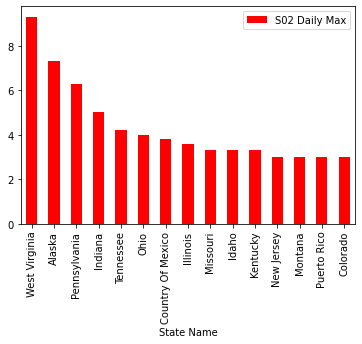

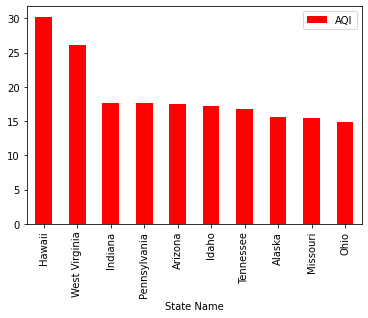

In [ ]:


#States with top 15 median of daily max  S02 levels for the years 2000-2020 (median less affected by outliers)
S02_df[['S02 Daily Max','State Name']].groupby(["State Name"]).median().sort_values(by='S02 Daily Max',ascending=False).head(15).plot.bar(color='r')
plt.show()


#States with top 10 median of daily AQI for the years 2000-2020 (median less affected by outliers)
S02_df[['AQI','State Name']].groupby(["State Name"]).mean().sort_values(by='AQI',ascending=False).head(10).plot.bar(color='r')
plt.show()

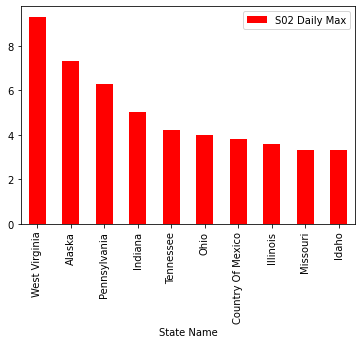

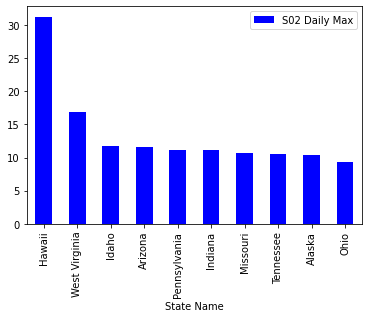

In [ ]:
#States with top 10 mean  of daily max SO2 levels for the most recent year (2020)
S02_2020[['1st Max Value','State Name']].groupby(["State Name"]).mean().sort_values(by='1st Max Value',ascending=False).head(10).plot.bar(color='b')
plt.show()

#States with top 10 mean of daily max SO2 levels  for the years 2000-2020
S02_df[['S02 Daily Max','State Name']].groupby(["State Name"]).mean().sort_values(by='S02 Daily Max',ascending=False).head(10).plot.bar(color='b')
plt.show()

##Visualization of daily maximum S02 for 9 different cities

In [ ]:
city_df = S02_df[S02_df["State Name"]== "Michigan"]
set(city_df['Address'])

In [ ]:
S02_recent = S02_df[S02_df['Year'].isin(['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'])]

#Want at least Denver, Tucson, Tampa, Phila, and Pitt since these are the locations we analyze in ML model
Pitt_df = S02_recent[S02_recent['Address']== '301 39th St, Pittsburgh, PA 15201 (Lawrenceville)']
Phoenix_df = S02_recent[S02_recent['Address'] == '2702 RC ESTERBROOKS BLVD']
Philadelphia_df = S02_recent[S02_recent['Address']== '24TH & RITNER STREETS']
Denver_df = S02_recent[S02_recent['Address']== '2105 BROADWAY']
Tampa_df = S02_recent[S02_recent['Address']== '155 Columbia Dr, Tampa FL 33606']
LA_df = S02_recent[S02_recent['Address']== '1630 N MAIN ST, LOS ANGELES']

Houston_df =  S02_recent[S02_recent['Address']== '7421 Park Place Blvd']
KC_df = S02_recent[S02_recent['Address']== '1210 N. 10TH ST.,JFK RECREATION CENTER']
Chicago_df = S02_recent[S02_recent['Address']== '7801 LAWNDALE']



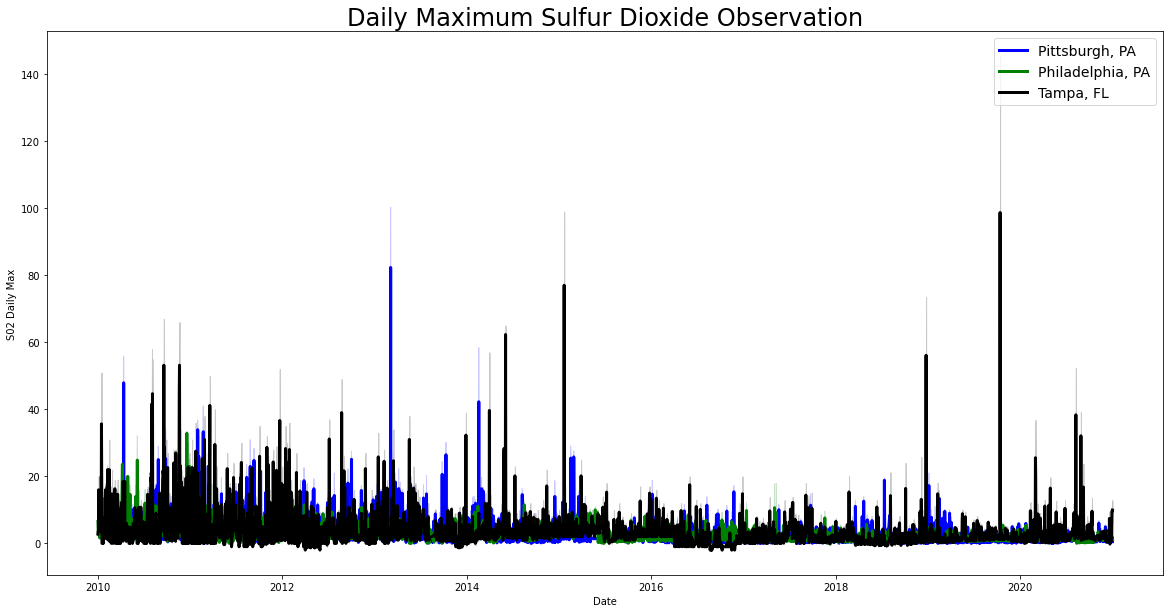

In [ ]:
#Eastern cities
fig,ax = plt.subplots(figsize=(20, 10))

sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3})

sns.lineplot(x="Date", y="S02 Daily Max", data=Pitt_df, color="b",label = 'Pittsburgh, PA')
sns.lineplot(x="Date", y="S02 Daily Max", data=Philadelphia_df, color="g",label = 'Philadelphia, PA')
sns.lineplot(x="Date", y="S02 Daily Max", data=Tampa_df, color="black",label = 'Tampa, FL')


ax.set_xticklabels([0,2010,2012,2014,2016,2018,2020])
plt.rcParams["xtick.labelsize"] = 15

ax.set_title('Daily Maximum Sulfur Dioxide Observation')
ax.legend(fontsize = 14)

#fig,ax = plt.subplots(figsize=(20, 10))

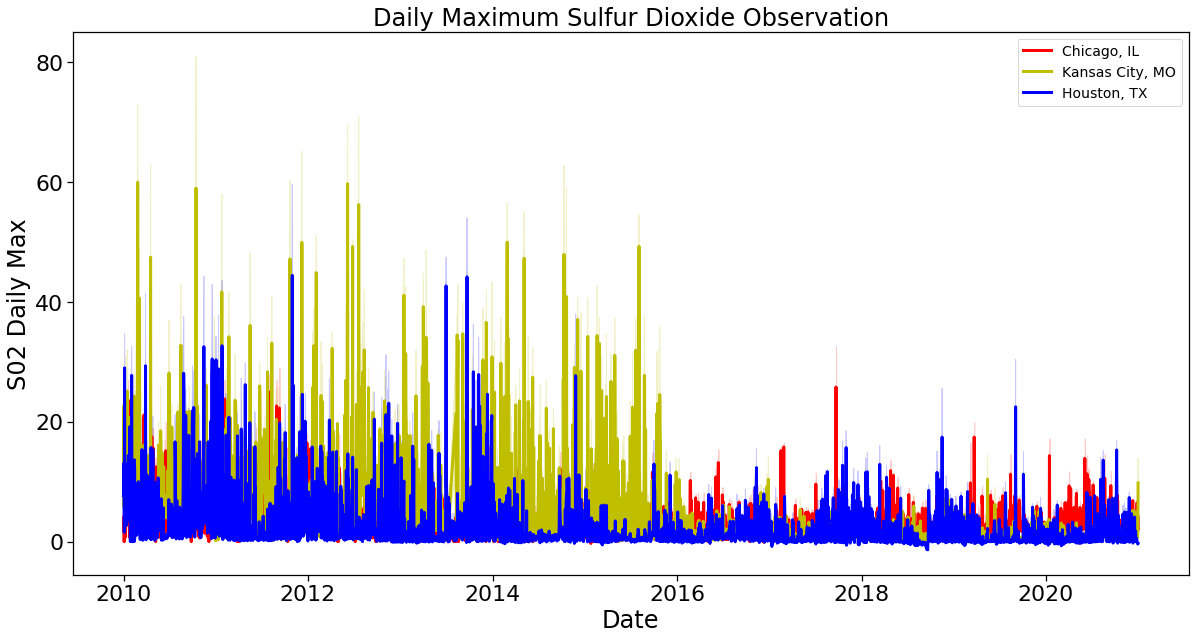

In [ ]:
#Midregion cities

fig,ax = plt.subplots(figsize=(20, 10))

sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3})


sns.lineplot(x="Date", y="S02 Daily Max", data=Chicago_df, color="r",label = 'Chicago, IL')
sns.lineplot(x="Date", y="S02 Daily Max", data=KC_df, color="y",label = 'Kansas City, MO')
sns.lineplot(x="Date", y="S02 Daily Max", data=Houston_df, color="b",label = 'Houston, TX')

ax.set_xticklabels([0,2010,2012,2014,2016,2018,2020])
plt.rcParams["xtick.labelsize"] = 15

ax.set_title('Daily Maximum Sulfur Dioxide Observation')
ax.legend(fontsize = 14)

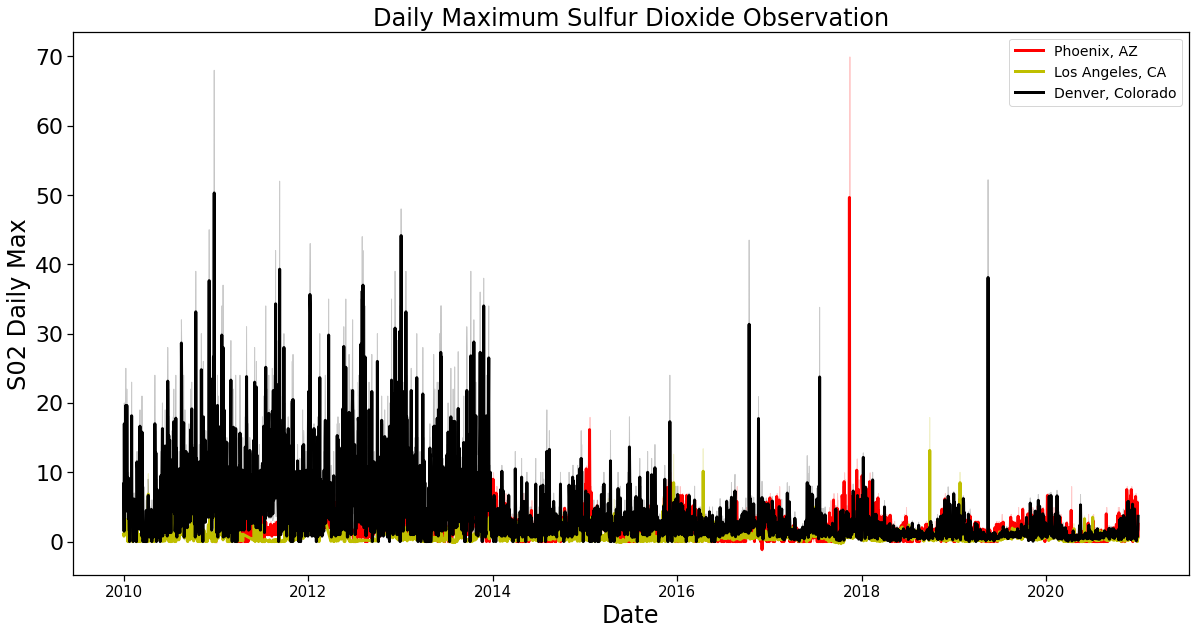

In [ ]:
#Western Cities
fig,ax = plt.subplots(figsize=(20, 10))

sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3})


sns.lineplot(x="Date", y="S02 Daily Max", data=Phoenix_df, color="r",label = 'Phoenix, AZ')
sns.lineplot(x="Date", y="S02 Daily Max", data=LA_df, color="y",label = 'Los Angeles, CA')
sns.lineplot(x="Date", y="S02 Daily Max", data=Denver_df, color="black",label = 'Denver, Colorado')

ax.set_xticklabels([0,2010,2012,2014,2016,2018,2020])
plt.rcParams["xtick.labelsize"] = 15

ax.set_title('Daily Maximum Sulfur Dioxide Observation')
ax.legend(fontsize = 14)

#Time Series

##Plotting data for a particular monitoring location

In [ ]:
'''
Address_df = State_df[State_df['Address']== '520 Orchard Ave, Avalon, PA 15202 (Avalon)']
fig,ax = plt.subplots(figsize=(20, 10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3})

sns.lineplot(x="Date Local", y="1st Max Value", data=Address_df, color="g",label = 'Avalon, PA')
'''

In [ ]:
State_df = S02_df[S02_df['State Name'] == 'Michigan']
city_df = S02_df[S02_df['City Name']== 'Chicago']
set(city_df['Address'])

{'103RD AND LUELLA',
 '321 S. FRANKLIN',
 '7801 LAWNDALE',
 'WASHINGTON ELEM. SCH., 3611 E. 114TH ST.'}

In [ ]:
#Address_df
first = Address_df.groupby('Date').first().reset_index()
first

,Date,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Year,Units of Measure,Event Type,Observation Count,Observation Percent,1st Max Hour,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,S02 Daily Mean,S02 Daily Max
0,2000-01-01,42,3,2,42401,2,40.499767,-80.071337,WGS84,Sulfur dioxide,1 HOUR,SO2 1-hour 2010,2000,Parts per billion,None,24,100.0,12,33.0,39.0,INSTRUMENTAL - ULTRA VIOLET STIMULATED FLUORESCNC,Avalon,"520 Orchard Ave, Avalon, PA 15202 (Avalon)",Pennsylvania,Allegheny,Avalon,"Pittsburgh, PA",2013-06-11,9.833333,23.0
1,2000-01-02,42,3,2,42401,2,40.499767,-80.071337,WGS84,Sulfur dioxide,1 HOUR,SO2 1-hour 2010,2000,Parts per billion,None,24,100.0,21,70.0,39.0,INSTRUMENTAL - ULTRA VIOLET STIMULATED FLUORESCNC,Avalon,"520 Orchard Ave, Avalon, PA 15202 (Avalon)",Pennsylvania,Allegheny,Avalon,"Pittsburgh, PA",2013-06-11,19.666667,51.0
2,2000-01-03,42,3,2,42401,2,40.499767,-80.071337,WGS84,Sulfur dioxide,1 HOUR,SO2 1-hour 2010,2000,Parts per billion,None,23,96.0,0,76.0,39.0,INSTRUMENTAL - ULTRA VIOLET STIMULATED FLUORESCNC,Avalon,"520 Orchard Ave, Avalon, PA 15202 (Avalon)",Pennsylvania,Allegheny,Avalon,"Pittsburgh, PA",2013-06-11,16.086957,56.0
3,2000-01-04,42,3,2,42401,2,40.499767,-80.071337,WGS84,Sulfur dioxide,1 HOUR,SO2 1-hour 2010,2000,Parts per billion,None,24,100.0,22,11.0,39.0,INSTRUMENTAL - ULTRA VIOLET STIMULATED FLUORESCNC,Avalon,"520 Orchard Ave, Avalon, PA 15202 (Avalon)",Pennsylvania,Allegheny,Avalon,"Pittsburgh, PA",2013-06-11,2.666667,8.0
4,2000-01-05,42,3,2,42401,2,40.499767,-80.071337,WGS84,Sulfur dioxide,1 HOUR,SO2 1-hour 2010,2000,Parts per billion,None,24,100.0,11,14.0,39.0,INSTRUMENTAL - ULTRA VIOLET STIMULATED FLUORESCNC,Avalon,"520 Orchard Ave, Avalon, PA 15202 (Avalon)",Pennsylvania,Allegheny,Avalon,"Pittsburgh, PA",2013-06-11,2.875000,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7522,2020-10-29,42,3,2,42401,1,40.499767,-80.071337,WGS84,Sulfur dioxide,1 HOUR,SO2 1-hour 2010,2020,Parts per billion,None,24,100.0,0,0.0,60.0,INSTRUMENTAL - PULSED FLUORESCENT,Avalon,"520 Orchard Ave, Avalon, PA 15202 (Avalon)",Pennsylvania,Allegheny,Avalon,"Pittsburgh, PA",2021-01-19,0.000000,0.0
7523,2020-10-30,42,3,2,42401,1,40.499767,-80.071337,WGS84,Sulfur dioxide,1 HOUR,SO2 1-hour 2010,2020,Parts per billion,None,24,100.0,0,0.0,60.0,INSTRUMENTAL - PULSED FLUORESCENT,Avalon,"520 Orchard Ave, Avalon, PA 15202 (Avalon)",Pennsylvania,Allegheny,Avalon,"Pittsburgh, PA",2021-01-19,0.000000,0.0
7524,2020-10-31,42,3,2,42401,1,40.499767,-80.071337,WGS84,Sulfur dioxide,1 HOUR,SO2 1-hour 2010,2020,Parts per billion,None,24,100.0,0,0.0,60.0,INSTRUMENTAL - PULSED FLUORESCENT,Avalon,"520 Orchard Ave, Avalon, PA 15202 (Avalon)",Pennsylvania,Allegheny,Avalon,"Pittsburgh, PA",2021-01-19,0.000000,0.0
7525,2020-11-01,42,3,2,42401,1,40.499767,-80.071337,WGS84,Sulfur dioxide,1 HOUR,SO2 1-hour 2010,2020,Parts per billion,None,24,100.0,0,0.0,60.0,INSTRUMENTAL - PULSED FLUORESCENT,Avalon,"520 Orchard Ave, Avalon, PA 15202 (Avalon)",Pennsylvania,Allegheny,Avalon,"Pittsburgh, PA",2021-01-19,0.000000,0.0


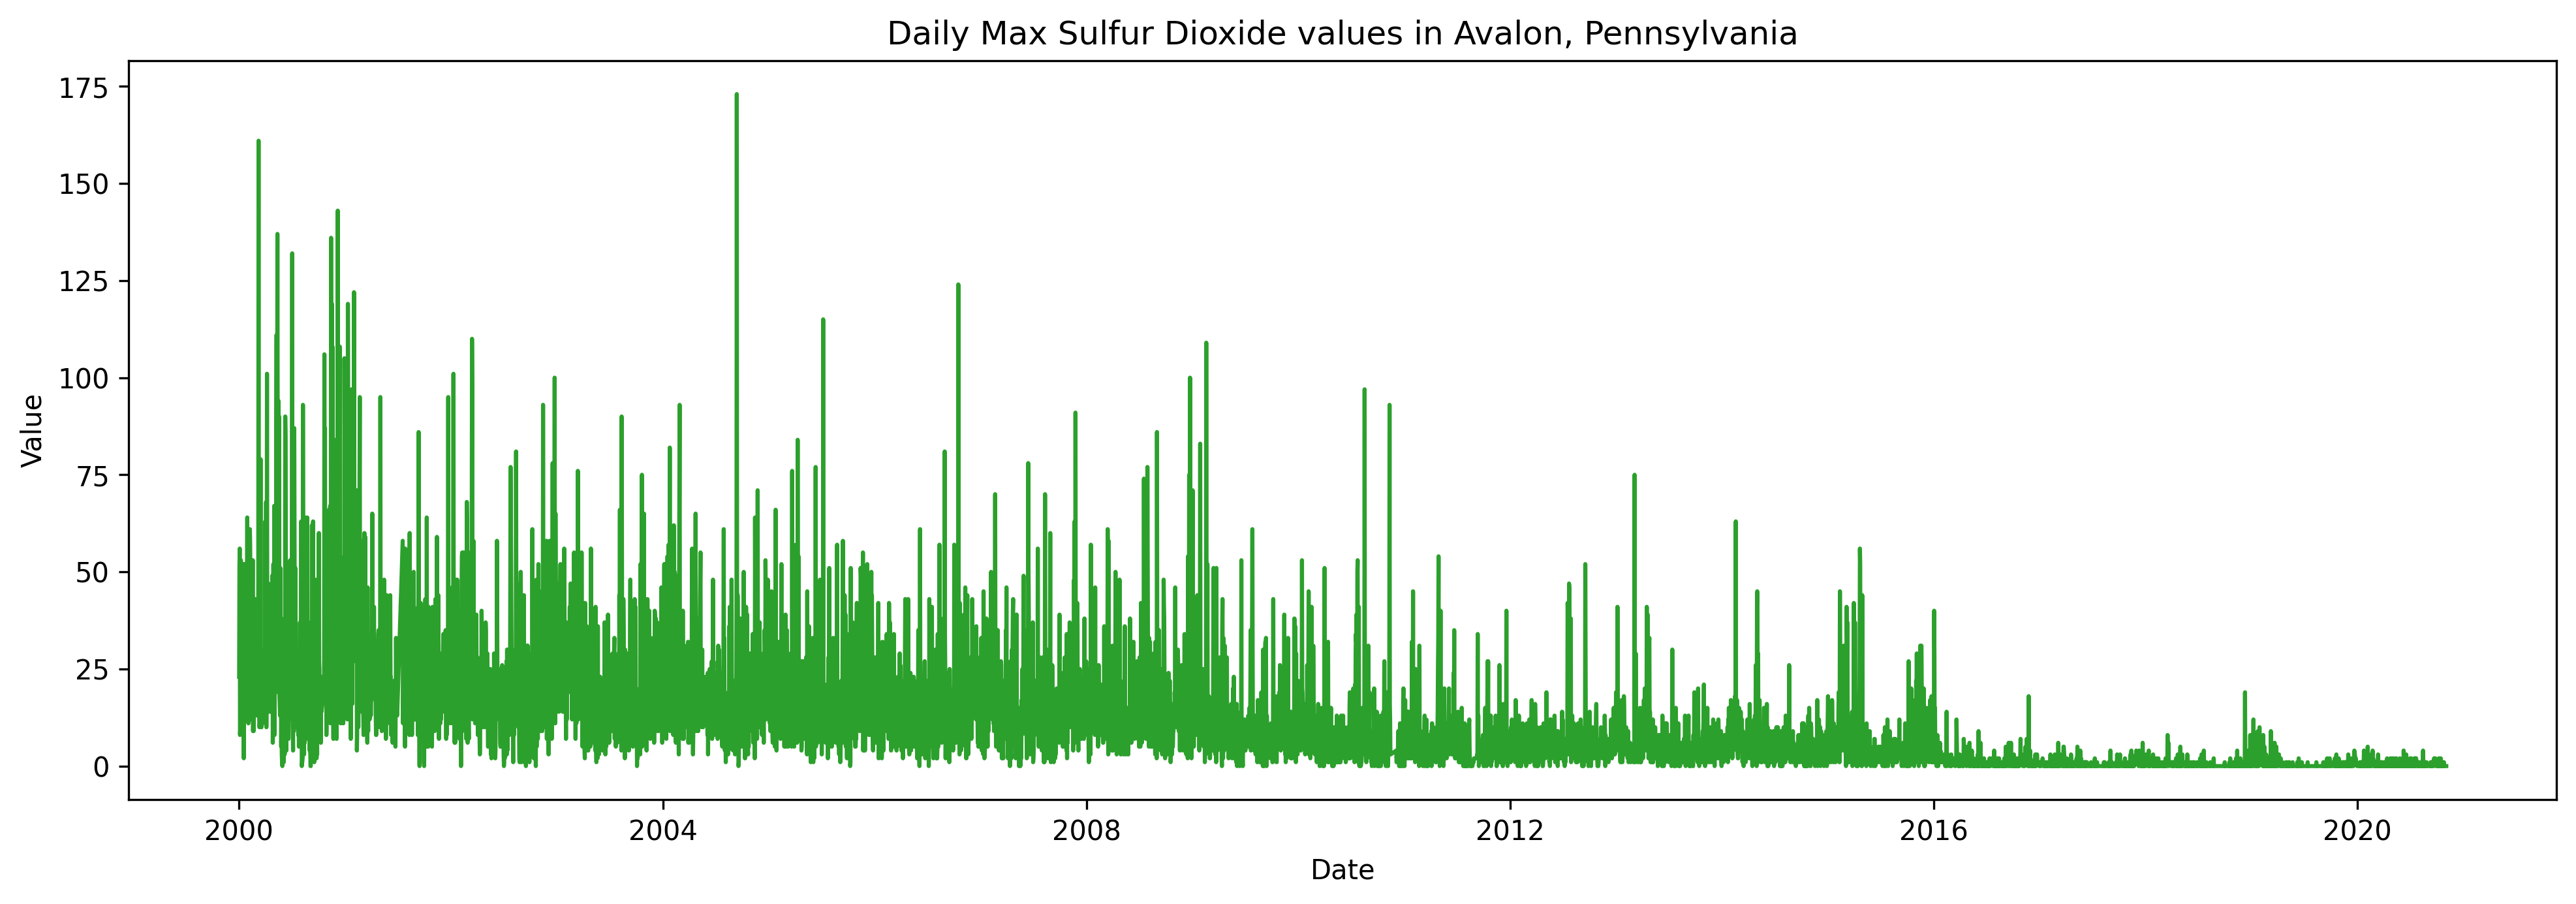

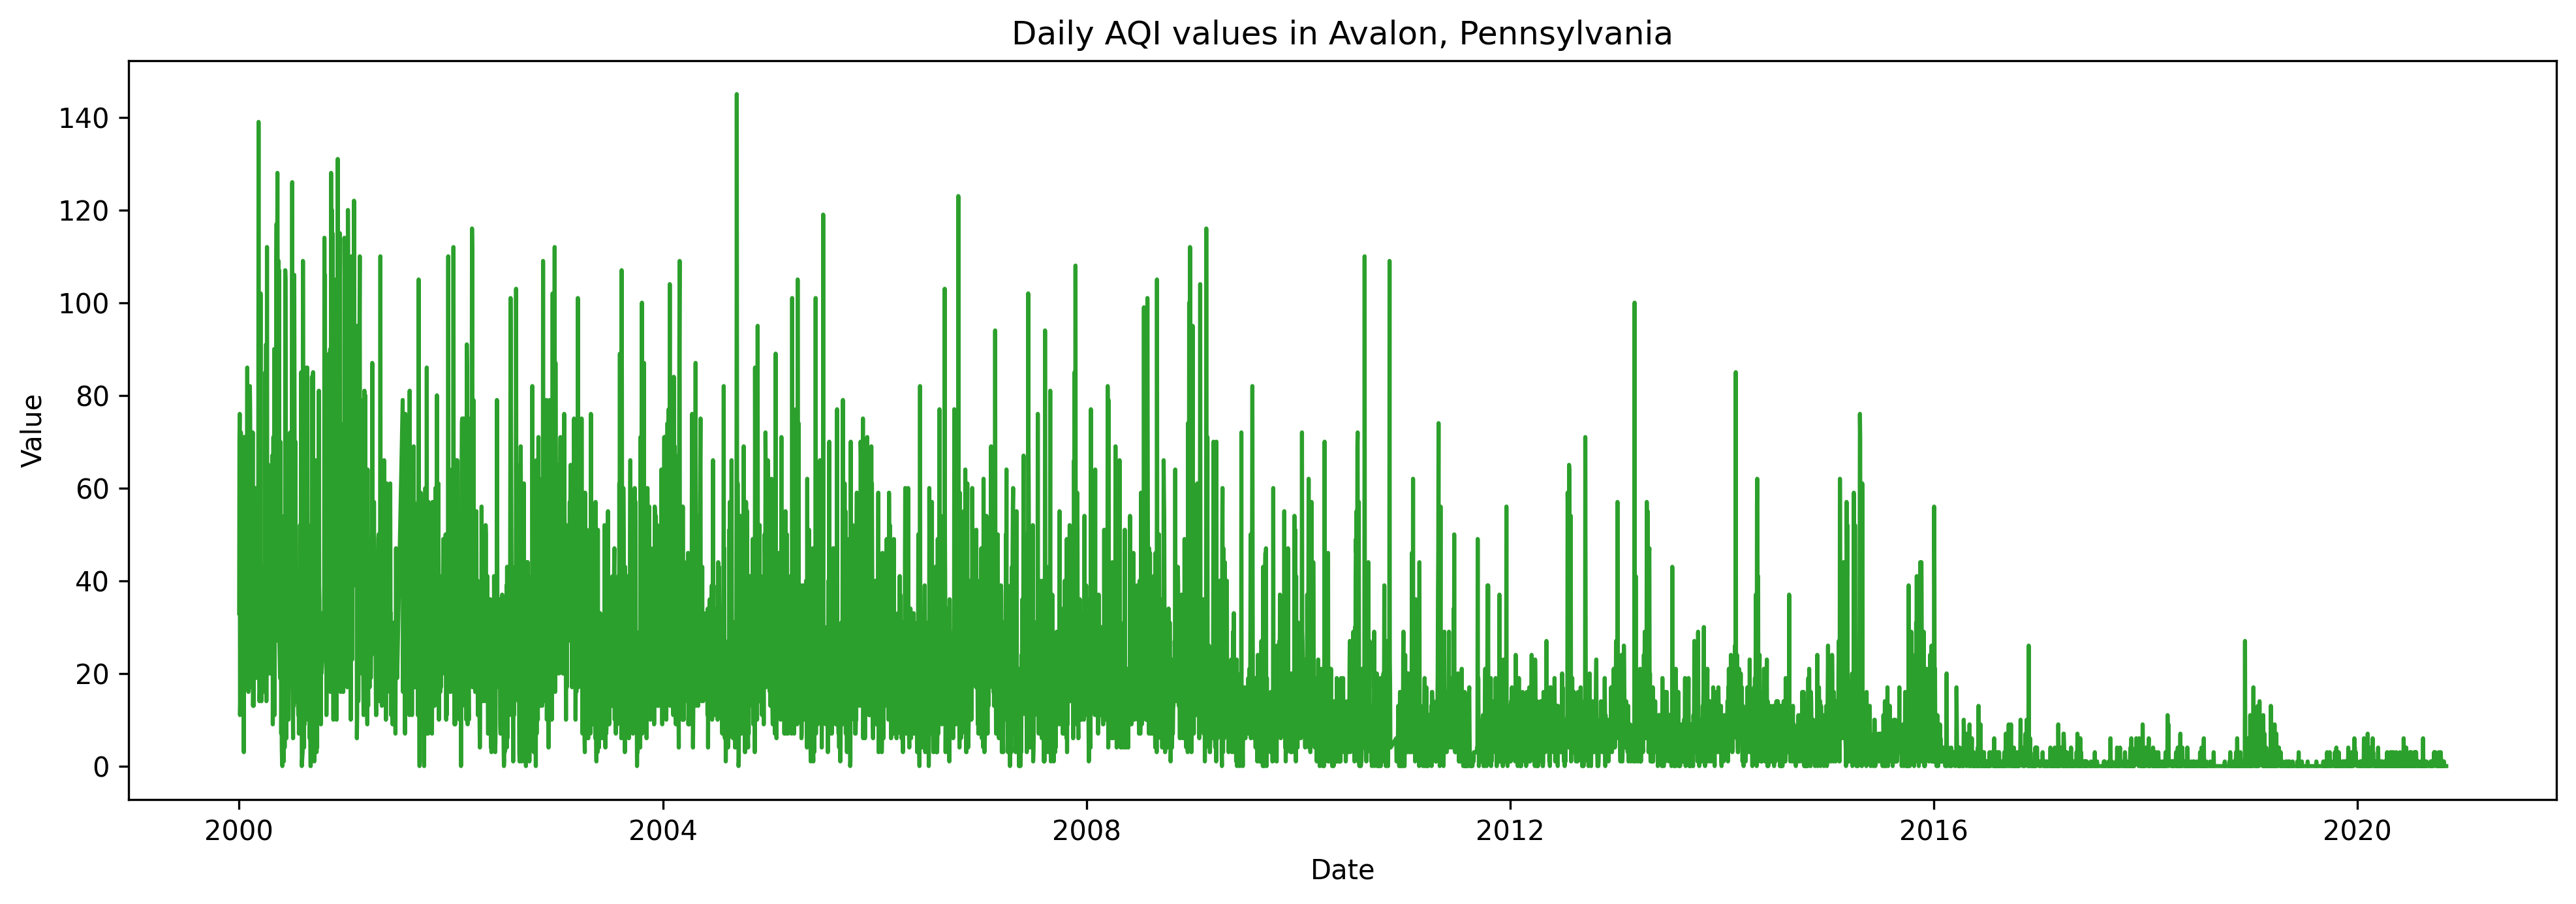

In [ ]:
#One interesting thing would be finding 2 locations with good coverage in proximity (ie within a city and nearby, and see the correlation
#between their two time series, also how does weather factor into this? For example, is the correlation stronger when wind is blowing in that direction?)
#24TH & RITNER STREETS; best data coverage in philly
#Good Addresses in PA:   CARNEGIE SCIENCE CENTER - 1 ALLEGHENY RD;
#Pairs/ location clusters:
#CHILWICK & WASHINGTON STS; CROTON ST & JEFFERSON ST; ---New Castle
#
#HILLMAN STATE PARK - KINGS CREEK ROAD; 3640 Old Oakdale Rd, McDonald, PA 15057 (South Fayette);  520 Orchard Ave, Avalon, PA 15202 (Avalon); --PIT
#
#HILL ST.; --Middle of PA
#CLOSE TO PIT; 301 39th St, Pittsburgh, PA 15201 (Lawrenceville); 2ND AVE & 7TH ST; 
#405 WHEELER AVE, MCKEES ROCKS, PA 15132;    OVERLOOK SITE - NEAR STONE HILL ROAD
# CLOSE TO PHI; ROCKVIEW LANE; STATE ARMORY - 1046 BELVOIR RD; 1059 Arnold Road
#ROUTE 168 & TOMLINSON ROAD; 10TH AND MARNE STREETS; 


#this gives us all the monitoring site addresses within a particular state
#State_df = S02_df[S02_df['State Name'] == 'Missouri']

Address_df = S02_df[S02_df['Address']== '520 Orchard Ave, Avalon, PA 15202 (Avalon)']
Address_df = Address_df.groupby('Date').first().reset_index()
#Address_df.dtypes


#Address_df.head()

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=300):
    city = list(df['City Name'])[0]
    state = ', '+list(df['State Name'])[0]
    plt.figure(figsize=(16,5), dpi=dpi)
   
    plt.plot(x, y, color= 'tab:green')
    plt.gca().set(title=title+city+state , xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(Address_df, x=Address_df['Date'], y= Address_df['S02 Daily Max'], title='Daily Max Sulfur Dioxide values in ' )
plot_df(Address_df, x=Address_df['Date'], y= Address_df['AQI'], title='Daily AQI values in ' )

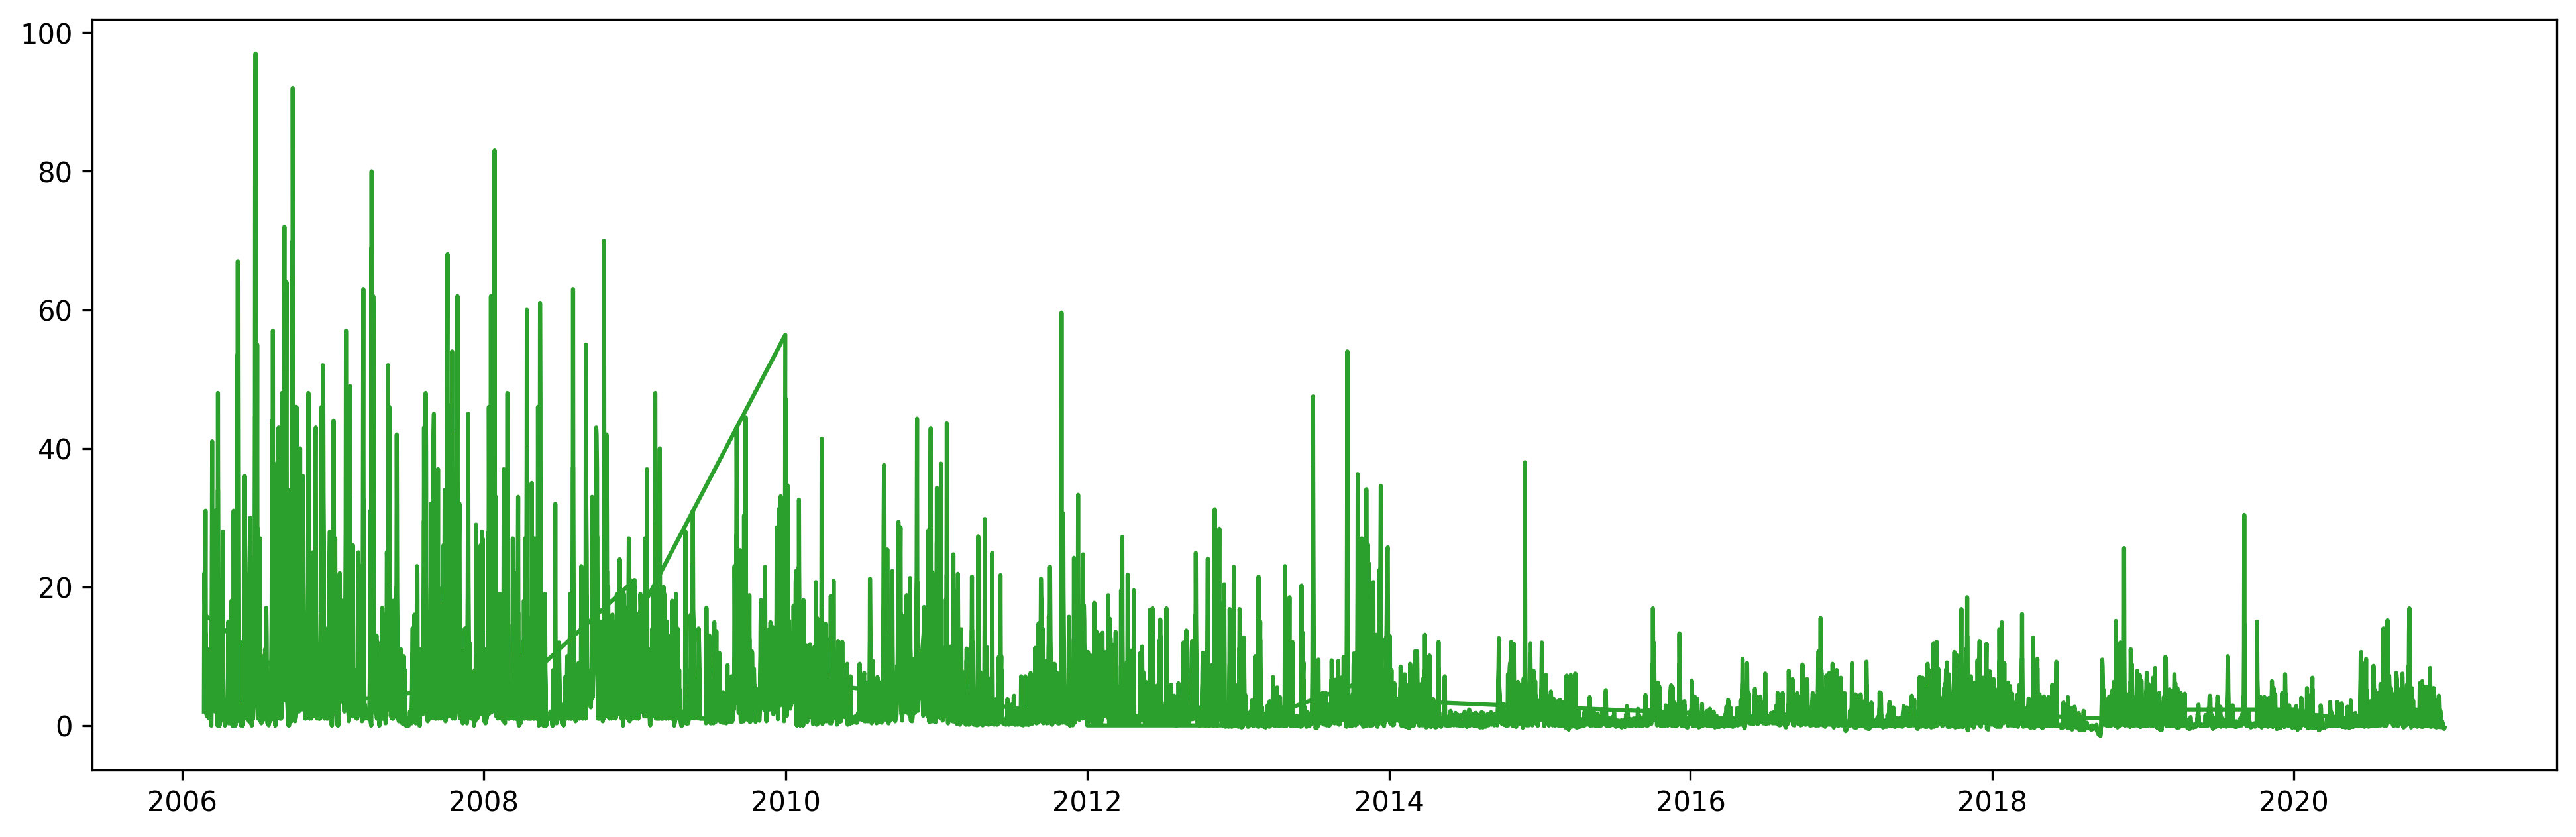

In [ ]:
plt.figure(figsize=(16,5), dpi=300)
#plt.gca().set(title=title+city+state , xlabel=xlabel, ylabel=ylabel)
plt.plot(Address_df['Date'], Address_df['S02 Daily Max'], color= 'tab:green')


##Fitting a statistical distribution to the data

###Histograms of AQI and Daily S02 max values

In [ ]:
#Both have fairly similar distributions, which seem to approximate an exponential distribution
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=S02_df, x="AQI", kind="hist", bins = 100, aspect = 1.5)
sns.displot(data=S02_df, x="S02 Daily Max", kind="hist", bins = 100, aspect = 1.5)

###fit_distribution function

In [ ]:
get_common_distributions()

['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform']

,sumsquare_error,aic,bic,kl_div
norm,0.000015,3.066128e+06,-1.973549e+08,0.009717
expon,0.000101,6.324218e+04,-1.835311e+08,inf
rayleigh,inf,inf,inf,inf
lognorm,inf,inf,inf,inf


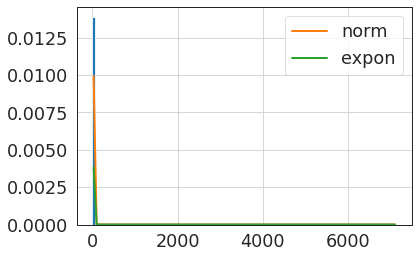

In [ ]:
S02_daily_max = S02_df['S02 Daily Max'].values
f = Fitter(S02_daily_max ,
           distributions=['rayleigh',
                          'lognorm',
                          "expon",
                          "norm"])
f.fit()
f.summary()

    

In [ ]:
##this explicitly gets the best distribution for the data we supplied along with the optimal parameters
f.get_best(method = 'sumsquare_error')

{'expon': {'loc': 0.0, 'scale': 9.838763037268318}}

##Multiplicative/ Additive decomposition

In [ ]:
Address_df

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Year,Units of Measure,Event Type,Observation Count,Observation Percent,1st Max Hour,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,Date,S02 Daily Mean,S02 Daily Max
303587,42,3,2,42401,2,40.499767,-80.071337,WGS84,Sulfur dioxide,1 HOUR,SO2 1-hour 2010,2000,Parts per billion,None,24,100.0,12,33.0,39.0,INSTRUMENTAL - ULTRA VIOLET STIMULATED FLUORESCNC,Avalon,"520 Orchard Ave, Avalon, PA 15202 (Avalon)",Pennsylvania,Allegheny,Avalon,"Pittsburgh, PA",2013-06-11,2000-01-01,9.833333,23.0
303588,42,3,2,42401,2,40.499767,-80.071337,WGS84,Sulfur dioxide,1 HOUR,SO2 1-hour 2010,2000,Parts per billion,None,24,100.0,21,70.0,39.0,INSTRUMENTAL - ULTRA VIOLET STIMULATED FLUORESCNC,Avalon,"520 Orchard Ave, Avalon, PA 15202 (Avalon)",Pennsylvania,Allegheny,Avalon,"Pittsburgh, PA",2013-06-11,2000-01-02,19.666667,51.0
303589,42,3,2,42401,2,40.499767,-80.071337,WGS84,Sulfur dioxide,1 HOUR,SO2 1-hour 2010,2000,Parts per billion,None,23,96.0,0,76.0,39.0,INSTRUMENTAL - ULTRA VIOLET STIMULATED FLUORESCNC,Avalon,"520 Orchard Ave, Avalon, PA 15202 (Avalon)",Pennsylvania,Allegheny,Avalon,"Pittsburgh, PA",2013-06-11,2000-01-03,16.086957,56.0
303590,42,3,2,42401,2,40.499767,-80.071337,WGS84,Sulfur dioxide,1 HOUR,SO2 1-hour 2010,2000,Parts per billion,None,24,100.0,22,11.0,39.0,INSTRUMENTAL - ULTRA VIOLET STIMULATED FLUORESCNC,Avalon,"520 Orchard Ave, Avalon, PA 15202 (Avalon)",Pennsylvania,Allegheny,Avalon,"Pittsburgh, PA",2013-06-11,2000-01-04,2.666667,8.0
303591,42,3,2,42401,2,40.499767,-80.071337,WGS84,Sulfur dioxide,1 HOUR,SO2 1-hour 2010,2000,Parts per billion,None,24,100.0,11,14.0,39.0,INSTRUMENTAL - ULTRA VIOLET STIMULATED FLUORESCNC,Avalon,"520 Orchard Ave, Avalon, PA 15202 (Avalon)",Pennsylvania,Allegheny,Avalon,"Pittsburgh, PA",2013-06-11,2000-01-05,2.875000,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7249339,42,3,2,42401,1,40.499767,-80.071337,WGS84,Sulfur dioxide,3-HR BLK AVG,SO2 3-hour 1971,2020,Parts per billion,None,8,100.0,2,NaN,NaN,-,Avalon,"520 Orchard Ave, Avalon, PA 15202 (Avalon)",Pennsylvania,Allegheny,Avalon,"Pittsburgh, PA",2021-01-19,2020-10-29,0.000000,0.0
7249340,42,3,2,42401,1,40.499767,-80.071337,WGS84,Sulfur dioxide,3-HR BLK AVG,SO2 3-hour 1971,2020,Parts per billion,None,8,100.0,2,NaN,NaN,-,Avalon,"520 Orchard Ave, Avalon, PA 15202 (Avalon)",Pennsylvania,Allegheny,Avalon,"Pittsburgh, PA",2021-01-19,2020-10-30,0.000000,0.0
7249341,42,3,2,42401,1,40.499767,-80.071337,WGS84,Sulfur dioxide,3-HR BLK AVG,SO2 3-hour 1971,2020,Parts per billion,None,8,100.0,2,NaN,NaN,-,Avalon,"520 Orchard Ave, Avalon, PA 15202 (Avalon)",Pennsylvania,Allegheny,Avalon,"Pittsburgh, PA",2021-01-19,2020-10-31,0.000000,0.0
7249342,42,3,2,42401,1,40.499767,-80.071337,WGS84,Sulfur dioxide,3-HR BLK AVG,SO2 3-hour 1971,2020,Parts per billion,None,8,100.0,2,NaN,NaN,-,Avalon,"520 Orchard Ave, Avalon, PA 15202 (Avalon)",Pennsylvania,Allegheny,Avalon,"Pittsburgh, PA",2021-01-19,2020-11-01,0.000000,0.0


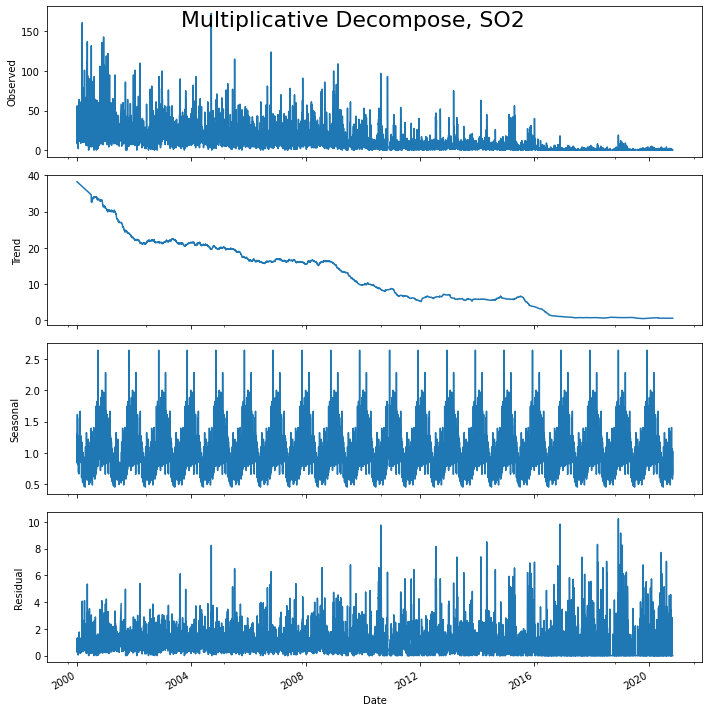

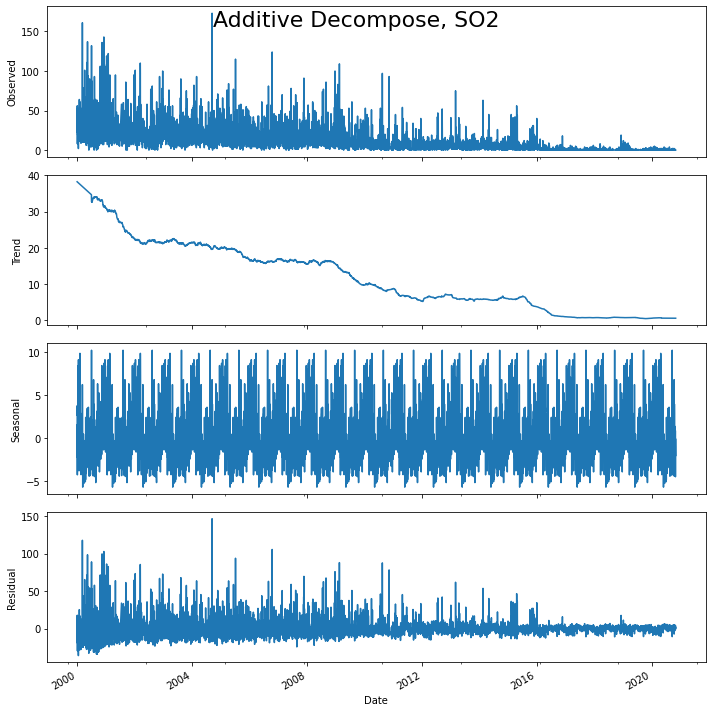

In [ ]:
#This makes the date column the index column, which is necessary for time series decomposition
#what about tests for seasonality - by eye, it is probably not stationary
#Then, how can we make it stationary for forecasting purposes?
Address_df = Address_df.set_index('Date')


#increases 1st max value by 0.0001 so that all values are >0
Address_df['S02 Daily Max']= Address_df['S02 Daily Max'] +0.000001

#Decomposition of time series into trend/ seasonality/ cylic by additive/ multiplicative models

# Multiplicative Decomposition 
result_mul = seasonal_decompose(Address_df['S02 Daily Max'], model='multiplicative', freq= 365, extrapolate_trend= 'freq')

# Additive Decomposition
result_add = seasonal_decompose(Address_df['S02 Daily Max'], model='additive', freq =365, extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose, SO2', fontsize=22)
result_add.plot().suptitle('Additive Decompose, SO2', fontsize=22)
plt.show()

In [ ]:
#Based on the previous section, we see the residuals for additive decomposition still carry a trend, for this reason
# we prefer multiplicative decomposition
#create a dataframe which has 3 compononents (seasonal, trend, resid) and the observed values for each date
#based on the formuala for multiplicative decomposition: observed = seasonal*trend*resid
# a stationary time series is one with roughly constant mean and variance as well as no seasonality

df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
Date,,,,
2000-01-01,0.926499,36.840243,0.673846,23.000001
2000-01-02,0.912241,36.814602,1.518590,51.000001
2000-01-03,0.797760,36.788960,1.908087,56.000001
2000-01-04,1.075195,36.763318,0.202390,8.000001
2000-01-05,0.713467,36.737676,0.381517,10.000001


##Forecasting with fbprophet package

In [ ]:
#Now we will use fbprophet package to forecast S02 values for 2 years based on previous data


#first we need to reinsert the Date index as a column, then rename the Date and columns
#for fbprophet package
date_df = Address_df.reset_index()



In [ ]:

date_df = date_df.rename(columns={'Date': 'ds', 'S02 Daily Max': 'y'})
#if model is underfitting increase changepoint, if model is overfitting decrease changepoint
S02_prophet = fbprophet.Prophet(changepoint_prior_scale=0.2)
S02_prophet.fit(date_df)
# Make a future dataframe for 2 years
S02_forecast = S02_prophet.make_future_dataframe(periods=365 * 2, freq='D')
# Make predictions
S02_pred = S02_prophet.predict(S02_forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
date_df['y']

In [ ]:
S02_pred.loc[:7526,'yhat']

Model RMSE: 11.829122750532912


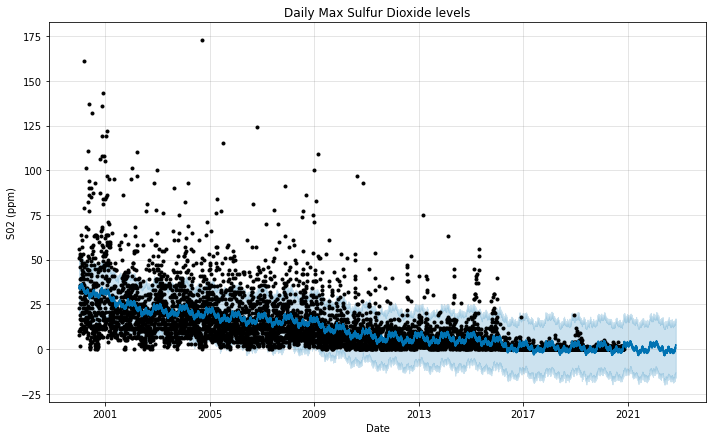

In [ ]:
#calculate rmse
se = np.square(S02_pred.loc[:7526,'yhat'] - date_df['y'])
mse = np.mean(se)
rmse = np.sqrt(mse)
print("Model RMSE:",rmse)
#plot the predictions along with actual data
S02_prophet.plot(S02_pred, xlabel = 'Date', ylabel = 'S02 (ppm)')
plt.title('Daily Max Sulfur Dioxide levels');

#plot the different components
#S02_prophet.plot_components(S02_pred)

In [ ]:
#Ideally we want addresses with data coverage from 2000-2020, we can then give the fbprophet a training set of 2000-18 and
#have it forecast the last 2 years, and compare its forecast to the actual data. 

#possible extensions: varying changepoint_prior_scale and plotting the resulting lines
#viewing the 'changepoints' (date) of the best model and seeing what they line up with

##Effect of changepoint prior scale

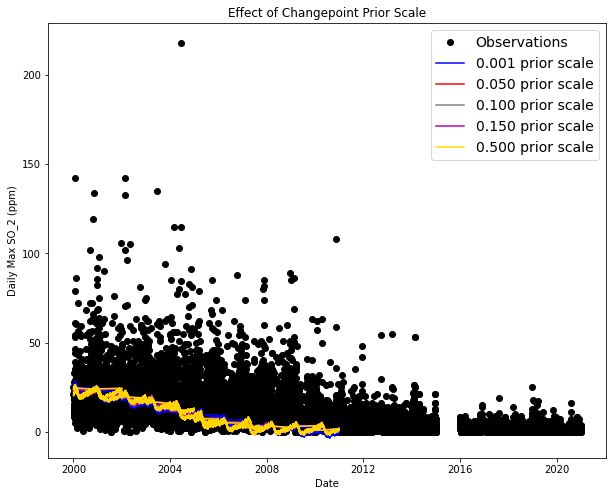

In [ ]:
#Visualizing the effect changing changepoint prior scale has on our model
#try 4 different changepoints
dict1 = {}
for changepoint in [0.001, 0.05, 0.1, 0.15, 0.5]:
    model = fbprophet.Prophet(daily_seasonality=False, changepoint_prior_scale=changepoint)
    model.fit(date_df)
    
    future_df = model.make_future_dataframe(periods=365, freq='D')
    future = model.predict(future_df)
    
    date_df[changepoint] = future['yhat']


# Create the plot
plt.figure(figsize=(10, 8))

# Actual observations
plt.plot(date_df['ds'], date_df['y'], 'ko', label = 'Observations')
colors = {0.001: 'b', 0.05: 'r', 0.1: 'grey', 0.15: 'm', 0.5: 'gold'}

# Plot each of the changepoint predictions
for changepoint in [0.001, 0.05, 0.1, 0.15, 0.5]:
    plt.plot(date_df['ds'], date_df[changepoint], color = colors[changepoint], label = '%.3f prior scale' % changepoint)
    
plt.legend(prop={'size': 14})
plt.xlabel('Date'); plt.ylabel('Daily Max SO_2 (ppm)'); plt.title('Effect of Changepoint Prior Scale');


##Change points

In [ ]:
#list of changepoints
#S02_prophet.changepoints

S02_changepoints = [date for date in S02_prophet.changepoints]
S02_changepoints

[Timestamp('2000-09-03 00:00:00'),
 Timestamp('2001-05-11 00:00:00'),
 Timestamp('2002-01-29 00:00:00'),
 Timestamp('2002-10-08 00:00:00'),
 Timestamp('2003-06-08 00:00:00'),
 Timestamp('2004-02-04 00:00:00'),
 Timestamp('2004-10-02 00:00:00'),
 Timestamp('2005-05-30 00:00:00'),
 Timestamp('2006-01-26 00:00:00'),
 Timestamp('2006-09-24 00:00:00'),
 Timestamp('2007-05-30 00:00:00'),
 Timestamp('2008-01-27 00:00:00'),
 Timestamp('2008-09-23 00:00:00'),
 Timestamp('2009-05-26 00:00:00'),
 Timestamp('2010-01-22 00:00:00'),
 Timestamp('2010-09-20 00:00:00'),
 Timestamp('2011-06-06 00:00:00'),
 Timestamp('2012-02-02 00:00:00'),
 Timestamp('2012-09-30 00:00:00'),
 Timestamp('2013-05-29 00:00:00'),
 Timestamp('2014-01-25 00:00:00'),
 Timestamp('2014-09-23 00:00:00'),
 Timestamp('2015-05-21 00:00:00'),
 Timestamp('2016-01-17 00:00:00'),
 Timestamp('2016-09-14 00:00:00')]

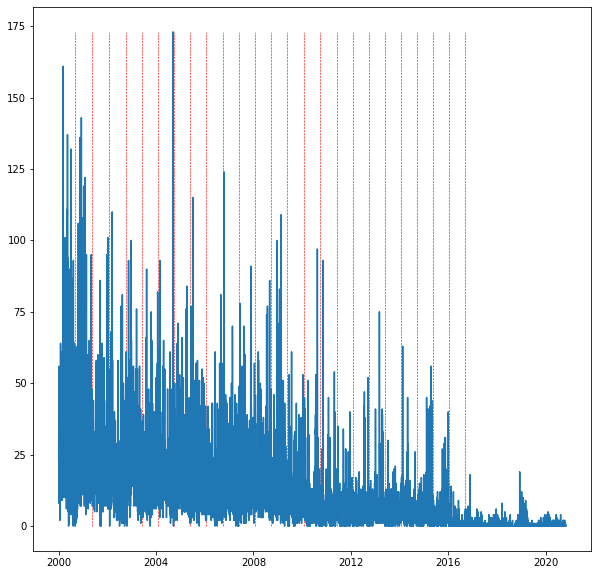

In [ ]:
#plotting the Actual data along with the changepoints
plt.plot(date_df['ds'], date_df['y'], label = 'Daily Max S02 (ppm)')
# Plot the changepoints
plt.vlines(S02_changepoints, ymin = 0, ymax= np.max(date_df['y']), colors = 'r', linewidth=0.6, linestyles = 'dashed', label = 'Changepoints')

##Granger Causality Test


##Creating list of monitoring locations with good data coverage

In [ ]:
add_ls = list(set(S02_df['Address']))
good_add_ls = []
for i in range(len(add_ls)):
    df = S02_df[S02_df['Address']==add_ls[i]]
    df = df.groupby('Date').first().reset_index()
    if(df.shape[0]>=6000):
        good_add_ls.append(add_ls[i])

In [ ]:
len(good_add_ls)

236

In [ ]:
good_add_df = pd.DataFrame(good_add_ls)

csv = good_add_df.to_csv("good_add_csv",index=True)

Randomly sampling locations, calculating distance and applying GCT

In [ ]:
#Great Circle calculations:

import math

DEGREES_IN_RADIAN = 57.29577951
MEAN_EARTH_RADIUS_KM = 6371
KILOMETRES_IN_MILE = 1.60934


def conv_radians(degree):
    return degree/ DEGREES_IN_RADIAN

def calc_central_angle(lat1,lat2,lon1,lon2):


        if lon1>lon2:
            longitudes_abs_diff = lon1-lon2
        else:
            longitudes_abs_diff = lon2-lon1

        central_angle_radians = math.acos( math.sin(lat1)
                                         * math.sin(lat2)
                                         + math.cos(lat1)
                                         * math.cos(lat2)
                                         * math.cos(longitudes_abs_diff))
        return central_angle_radians

def calc_dist(central_angle):


        distance_kilometres = MEAN_EARTH_RADIUS_KM * central_angle

        distance_miles = distance_kilometres / KILOMETRES_IN_MILE
        return distance_miles

In [ ]:
import math
import random
from statsmodels.tsa.stattools import grangercausalitytests

tup_ls = []


for i in range(900):
    x = random.randint(0,len(good_add_ls)-1)
    y = random.randint(0,len(good_add_ls)-1)

    Address_df1 = S02_df[S02_df['Address']==good_add_ls[x]]
    Address_df2 = S02_df[S02_df['Address']==good_add_ls[y]]

    Address_df1.dropna(subset=['S02 Daily Max'],inplace=True)
    Address_df2.dropna(subset=['S02 Daily Max'],inplace=True)

    col1 = list(Address_df1['S02 Daily Max'])
    col2 = list(Address_df2['S02 Daily Max'])





    #calculating distance
    lat1, lon1 = list(Address_df1['Latitude'])[1], list(Address_df1['Longitude'])[1]
    lat2, lon2 = list(Address_df2['Latitude'])[1], list(Address_df2['Longitude'])[1]
    lat1, lon1 = conv_radians(lat1), conv_radians(lon1)
    lat2, lon2 = conv_radians(lat2), conv_radians(lon2)
    central_angle = calc_central_angle(lat1,lat2,lon1,lon2)
    dist = calc_dist(central_angle)




    #make the columns the same length
    if (len(col1)>len(col2)):
        col1 = col1[:len(col2)]

    if (len(col2)>len(col1)):
        col2 = col2[:len(col1)]


    #create new dataframe which is the concatentation of these two columns

    df1 = pd.DataFrame(col1)
    df2 = pd.DataFrame(col2)
    df = pd.concat([df1,df2],axis=1)





    gct = grangercausalitytests(df, maxlag=5 ,verbose=False)
    correlated = 0
    if (gct[1][0]['ssr_chi2test'][1])<0.05:
        correlated = 1
    elif (gct[2][0]['ssr_chi2test'][1])<0.05:
        correlated = 1
    elif (gct[3][0]['ssr_chi2test'][1])<0.05:
        correlated = 1


    ls2 = [dist,correlated]
    tup_ls.append(ls2)
    

In [ ]:
tup_ls

In [ ]:
df1 = pd.DataFrame(tup_ls, columns = ['Distance (miles)', 'Result of GCT'])

np.mean(df1['Result of GCT'])

0.9344444444444444

In [ ]:
bins = [1, 250, 500, 750, 1000, 1250, 1500,1750, 2000]
groups = df1.groupby(pd.cut(df1['Distance (miles)'], bins))
groups['Result of GCT'].mean()

Distance (miles)
(1, 250]        0.958904
(250, 500]      0.968750
(500, 750]      0.970588
(750, 1000]     0.921569
(1000, 1250]    0.894231
(1250, 1500]    0.940476
(1500, 1750]    0.941176
(1750, 2000]    0.888889
Name: Result of GCT, dtype: float64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


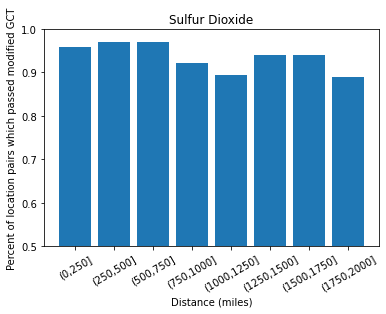

In [ ]:
bar_data = {'Distance (miles)':['(0,250]', '(250,500]', '(500,750]', '(750,1000]', '(1000,1250]', '(1250,1500]', '(1500,1750]', '(1750,2000]'],
          'Percent of location pairs which pass modified GCT':[0.959,0.969,0.971,0.922,0.894,0.94,0.941,0.889]}

bar_df = pd.DataFrame(bar_data)

plt.bar(bar_df['Distance (miles)'],bar_df['Percent of location pairs which pass modified GCT'])
plt.title('Sulfur Dioxide')
plt.xlabel('Distance (miles)')
plt.ylabel('Percent of location pairs which passed modified GCT')
plt.xticks(rotation=30)
plt.ylim(0.5,1)
plt.show()


##GCT

In [ ]:
Address_df = State_df[State_df['Address']== '520 Orchard Ave, Avalon, PA 15202 (Avalon)']
Address_df1 = State_df[State_df['Address']== '3640 Old Oakdale Rd, McDonald, PA 15057 (South Fayette)']
Address_df2 = State_df[State_df['Address']== 'HILLMAN STATE PARK - KINGS CREEK ROAD']

col = Address_df['S02 Daily Max']
col1 = Address_df1['S02 Daily Max']
col2 = Address_df2['S02 Daily Max']


print(len(col), len(col1), len(col2))

15049 15053 14721


In [ ]:
#This test tells us if one series is useful in forecasting another
#We will use it to see if we can accurately predict the daily max S02 value of one location given
#the daily max S02 value of another, nearby location
#CHARLER01 WASTE TREATMENT PLANT; 3640 Old Oakdale Rd, McDonald, PA 15057 (South Fayette);
#CHILWICK & WASHINGTON STS; CROTON ST & JEFFERSON ST.;

#Detroit:
#Address_df = State_df[State_df['Address']== '150 WATERMAN (DET-SW-GHIB)']
#Dallas:


#Location triple near PITT
#Address_df1 = State_df[State_df['Address']== '3640 Old Oakdale Rd, McDonald, PA 15057 (South Fayette)']
#Address_df2 = State_df[State_df['Address']== 'HILLMAN STATE PARK - KINGS CREEK ROAD']

from statsmodels.tsa.stattools import grangercausalitytests
city_df = S02_df[S02_df['City Name'] == 'Detroit']
Address_df1 = State_df[State_df['Address']== '520 Orchard Ave, Avalon, PA 15202 (Avalon)']
#Address_df2 = city_df[city_df['Address']== '150 WATERMAN (DET-SW-GHIB)']
Address_df2 = State_df[State_df['Address']== '640 Old Oakdale Rd, McDonald, PA 15057 (South Fayette)']


col1 = Address_df1['S02 Daily Max']
col2 = Address_df2['S02 Daily Max]

#make the columns the same length

if (len(col1)>len(col2)):
    col1 = col1[:len(col2)]

if (len(col2)>len(col1)):
    col2 = col2[:len(col1)]


#create new dataframe which is the concatentation of these two columns
data = []
for i in range(len(col1)):
    val1 = list(col1)[i]
    val2 = list(col2)[i]
    ls = [val1, val2]
    data.append(ls)

df = pd.DataFrame(data, columns = ['Address1 Daily Max S02', 'Address2 Daily Max S02'])
grangercausalitytests(df, maxlag=5)



In [ ]:
#Results of GCT:
#Mcdonald & Hillman: correlated at all lags up to 7
#Avalon & detroit: 
#McDonald & Avalon: correlated at all lags up to 7
#Avalon and Dallas:
#What's interesting here is that two locations which are rather far apart are correlated by this test

##Forecasting  with ARIMA and ETS models

###Plotting raw/ detrended/ and detrended+differenced data

In [ ]:
Address_df.dtypes

State Code                     object
County Code                     int64
Site Num                        int64
Parameter Code                  int64
POC                             int64
Latitude                      float64
Longitude                     float64
Datum                          object
Parameter Name                 object
Sample Duration                object
Pollutant Standard             object
Date Local             datetime64[ns]
Year                           object
Units of Measure               object
Event Type                     object
Observation Count               int64
Observation Percent           float64
Arithmetic Mean               float64
1st Max Value                 float64
1st Max Hour                    int64
AQI                           float64
Method Code                   float64
Method Name                    object
Local Site Name                object
Address                        object
State Name                     object
County Name 

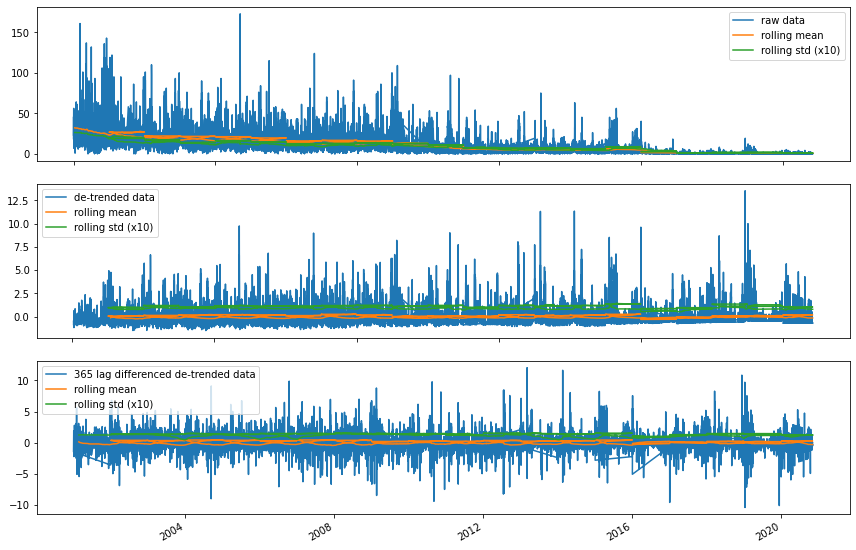

In [ ]:
Address_df = S02_df[S02_df['Address']== '520 Orchard Ave, Avalon, PA 15202 (Avalon)']
Address_df = Address_df.set_index('Date')
#zscore of S02 max (detrended)
Address_df['z_S02_max'] = (Address_df['S02 Daily Max'] - Address_df['S02 Daily Max'].rolling(window=365).mean()) / Address_df['S02 Daily Max'].rolling(window=365).std()
#365 lag differenced and detrended
Address_df['z_S02_differenced'] = Address_df['z_S02_max'] - Address_df['z_S02_max'].shift(365)

def plot_rolling(df, column, detrended, differenced):
    fig, ax = plt.subplots(3,figsize=(12, 9))
    ax[0].plot(df.index, df[column], label='raw data')
    ax[0].plot(df[column].rolling(window=365).mean(), label="rolling mean");
    ax[0].plot(df[column].rolling(window=365).std(), label="rolling std (x10)");
    ax[0].legend()

    ax[1].plot(df.index, df[detrended], label="de-trended data")
    ax[1].plot(df[detrended].rolling(window=365).mean(), label="rolling mean");
    ax[1].plot(df[detrended].rolling(window=365).std(), label="rolling std (x10)");
    ax[1].legend()

    ax[2].plot(df.index, df[differenced], label="365 lag differenced de-trended data")
    ax[2].plot(df[differenced].rolling(window=365).mean(), label="rolling mean");
    ax[2].plot(df[differenced].rolling(window=365).std(), label="rolling std (x10)");
    ax[2].legend()

    plt.tight_layout()
    fig.autofmt_xdate()

plot_rolling(Address_df, column = 'S02 Daily Max', detrended = 'z_S02_max', differenced = 'z_S02_differenced')


Raw data is not stationary, de-trending the data and differencing it with a lag of 365 (assumed to be the period of cyclicity) gives a series with roughly constant rolling mean and std dev

###ADF tests

In [ ]:
#this is hypothesis test to decide if our series is stationary or not
#testing S02
#So far, every address we've seen has stationary AQI/ so2 data without the need to detrend
#or otherwise stationarize the data

#24TH & RITNER STREETS; best data coverage in philly
#Good Addresses in PA:   CARNEGIE SCIENCE CENTER - 1 ALLEGHENY RD;
#Pairs/ location clusters:
#CHILWICK & WASHINGTON STS; CROTON ST & JEFFERSON ST; ---New Castle
#CHARLER01 WASTE TREATMENT PLANT; 3640 Old Oakdale Rd, McDonald, PA 15057 (South Fayette);  520 Orchard Ave, Avalon, PA 15202 (Avalon); --PIT
#HILL ST.; --Middle of PA
#CLOSE TO PIT; 301 39th St, Pittsburgh, PA 15201 (Lawrenceville); 2ND AVE & 7TH ST; 
#405 WHEELER AVE, MCKEES ROCKS, PA 15132;   HILLMAN STATE PARK - KINGS CREEK ROAD; OVERLOOK SITE - NEAR STONE HILL ROAD
# CLOSE TO PHI; ROCKVIEW LANE; STATE ARMORY - 1046 BELVOIR RD; 1059 Arnold Road
#ROUTE 168 & TOMLINSON ROAD; 10TH AND MARNE STREETS; 


#Address_df = State_df[State_df['Address']== '520 Orchard Ave, Avalon, PA 15202 (Avalon)']

print(" > Is the SO2_data stationary ?")
dftest = adfuller(Address_df['S02 Daily Max'], autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    


#testing AQI

AQI = Address_df['AQI'].fillna(value=np.mean(Address_df['AQI']) )

print(" > Is the AQI data stationary ?")
dftest = adfuller(AQI, autolag='BIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    

#Date is currently index, need to reset index to make it a column
plot_df = Address_df.reset_index(inplace=False)

#plot_df(plot_df, x=plot_df['Date Local'], y=plot_df['1st Max Value'], title='Daily Max S02 values in ' ) 

#plot_df(plot_df, x=plot_df['Date Local'], y=plot_df['AQI'], title='Daily AQI values in ' ) 

 > Is the SO2_data stationary ?
Test statistic = -5.203
P-value = 0.000
Critical values :
	1%: -3.4307858826422235 - The data is  stationary with 99% confidence
	5%: -2.861732641276271 - The data is  stationary with 95% confidence
	10%: -2.5668725383008506 - The data is  stationary with 90% confidence
 > Is the AQI data stationary ?
Test statistic = -8.656
P-value = 0.000
Critical values :
	1%: -3.43078527335832 - The data is  stationary with 99% confidence
	5%: -2.8617323720188734 - The data is  stationary with 95% confidence
	10%: -2.5668723949782133 - The data is  stationary with 90% confidence


###Autocorrelation plots (ACF & PACF)

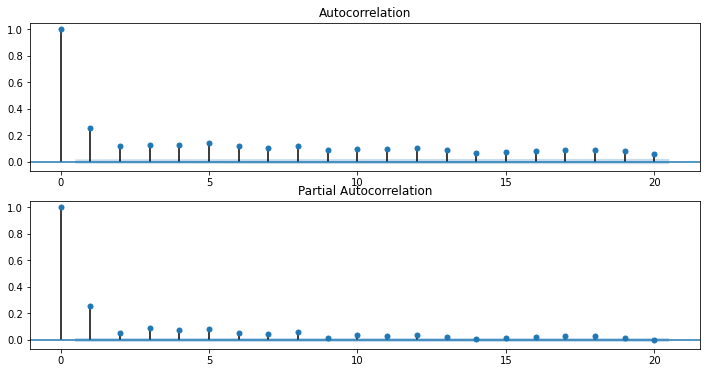

In [ ]:
#We will create a new column which is the zscore of S02 daily max data







#plotting ACF/ PACF

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(Address_df['z_S02_max'].dropna(), ax=ax[0], lags=20)
ax[1] = plot_pacf(Address_df['z_S02_max'].dropna(), ax=ax[1], lags=20)

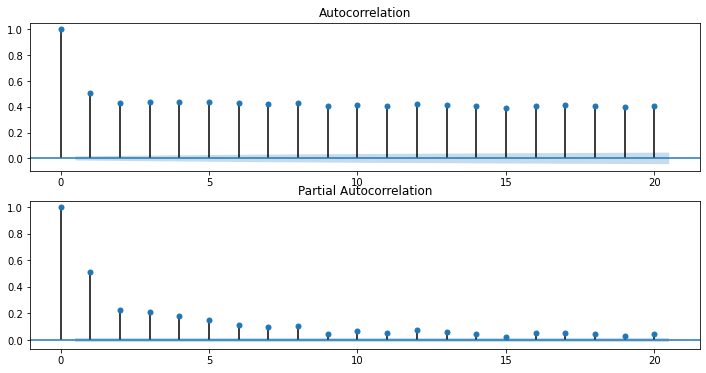

In [ ]:
fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(Address_df['S02 Daily Max'].dropna(), ax=ax[0], lags=20)
ax[1] = plot_pacf(Address_df['S02 Daily Max'].dropna(), ax=ax[1], lags=20)

### Fitting exponential smoothing models

In [ ]:
df = S02_df[S02_df['Address']== '520 Orchard Ave, Avalon, PA 15202 (Avalon)']
#reset index to begin at 0 and go to 15k, necessary for forecasting in the next cell
df.reset_index(inplace=True)
df = df[['Date', 'S02 Daily Max', 'AQI',  'Address']]
df

,Date,S02 Daily Max,AQI,Address
0,2000-01-01,23.0,33.0,"520 Orchard Ave, Avalon, PA 15202 (Avalon)"
1,2000-01-02,51.0,70.0,"520 Orchard Ave, Avalon, PA 15202 (Avalon)"
2,2000-01-03,56.0,76.0,"520 Orchard Ave, Avalon, PA 15202 (Avalon)"
3,2000-01-04,8.0,11.0,"520 Orchard Ave, Avalon, PA 15202 (Avalon)"
4,2000-01-05,10.0,14.0,"520 Orchard Ave, Avalon, PA 15202 (Avalon)"
...,...,...,...,...
15044,2020-10-29,0.0,NaN,"520 Orchard Ave, Avalon, PA 15202 (Avalon)"
15045,2020-10-30,0.0,NaN,"520 Orchard Ave, Avalon, PA 15202 (Avalon)"
15046,2020-10-31,0.0,NaN,"520 Orchard Ave, Avalon, PA 15202 (Avalon)"
15047,2020-11-01,0.0,NaN,"520 Orchard Ave, Avalon, PA 15202 (Avalon)"


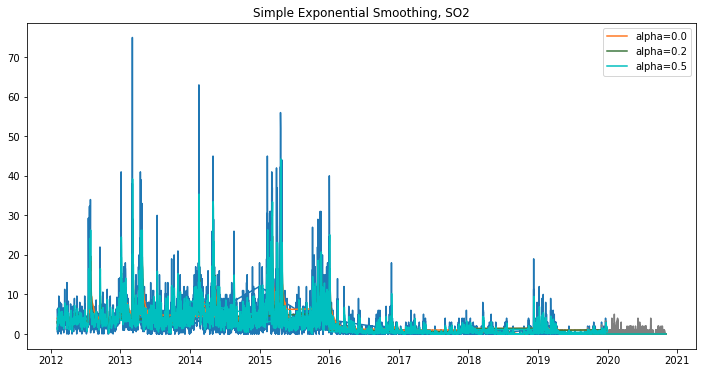

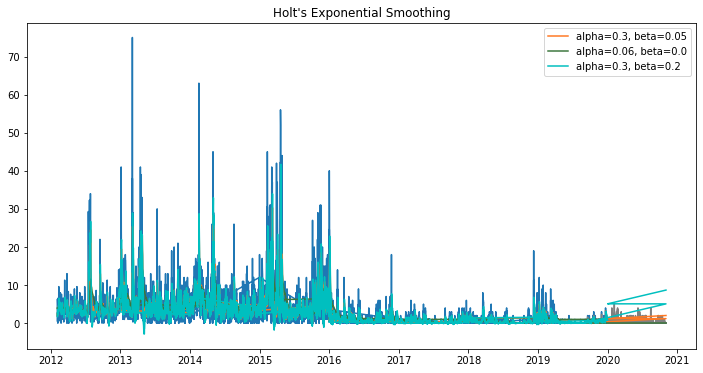

In [ ]:
train = df.iloc[:-730, :]
test = df.iloc[-730:, :]

pred = test.copy()

model = SimpleExpSmoothing(np.asarray(train['S02 Daily Max']))
model._index = train.index

fit1 = model.fit()
pred1 = fit1.forecast(730)
fit2 = model.fit(smoothing_level=.2)
pred2 = fit2.forecast(730)
fit3 = model.fit(smoothing_level=.5)
pred3 = fit3.forecast(730)

train_x, train_y = train['Date'], train['S02 Daily Max']
test_x, test_y = test['Date'], test['S02 Daily Max']

#Note that although the model is trained on the complete dataset
#only the last decade or so is plotted so as to zoom in on the forecast

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train_x[9000:], train_y[9000:])
ax.plot(test_x, test_y, color="gray")
for p, f, c in zip((pred1, pred2, pred3),(fit1, fit2, fit3),('#ff7823','#3c763d','c')):
    ax.plot(train_x[9000:], f.fittedvalues[9000:], color=c)
    ax.plot(test['Date'], p, label="alpha="+str(f.params['smoothing_level'])[:3], color=c)
plt.title("Simple Exponential Smoothing, SO2")    
plt.legend();
    
model = Holt(np.asarray(train['S02 Daily Max']))
model._index = train.index

fit1 = model.fit(smoothing_level=.3, smoothing_slope=.05)
pred1 = fit1.forecast(730)
fit2 = model.fit(optimized=True)
pred2 = fit2.forecast(730)
fit3 = model.fit(smoothing_level=.3, smoothing_slope=.2)
pred3 = fit3.forecast(730)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train_x[9000:], train_y[9000:])
ax.plot(test_x, test_y, color="gray")
for p, f, c in zip((pred1, pred2, pred3),(fit1, fit2, fit3),('#ff7823','#3c763d','c')):
    ax.plot(train_x[9000:], f.fittedvalues[9000:], color=c)
    ax.plot(test_x, p, label="alpha="+str(f.params['smoothing_level'])[:4]+", beta="+str(f.params['smoothing_slope'])[:4], color=c)
plt.title("Holt's Exponential Smoothing")
plt.legend();

###Fitting an ARIMA model

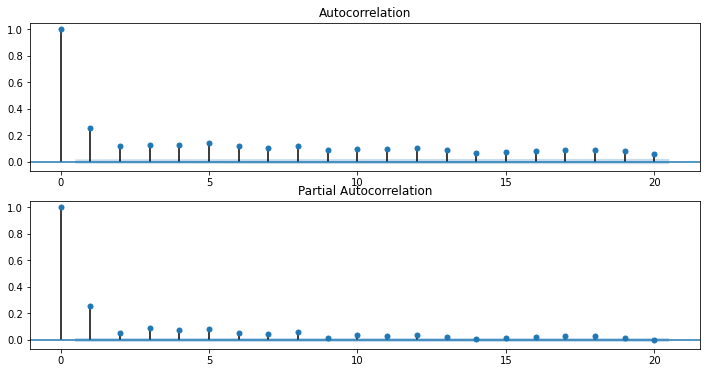

In [ ]:
#Our main questions asked here are which model parameters are best and why?
#ie what component of the data (trend, seasonal, cyclic, etc..) makes a particular
#set of parameters the best for ARIMA?
#Also, how does the best ARIMA model compare to the best Exponential Smoothing model we found in the last section?
#ARIMA can be broken into 3 components (AR, I, and MA)
#Arima(p,d,q)
#p - order of Autoregressive component
#d - order of the integrated component (differencing)
#q - order of the moving average component

#to get a sense of which order is needed, use acf/ pacf plots

#this model hyperparameter selection process is great to talk about in research paper
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(Address_df['z_S02_max'].dropna(), ax=ax[0], lags=20)
ax[1] = plot_pacf(Address_df['z_S02_max'].dropna(), ax=ax[1], lags=20)

####optimizing the differencing component

                              ARMA Model Results                              
Dep. Variable:          S02 Daily Max   No. Observations:                15049
Model:                     ARMA(0, 0)   Log Likelihood              -60178.378
Method:                           css   S.D. of innovations             13.196
Date:                Sun, 12 Dec 2021   AIC                         120360.757
Time:                        19:16:46   BIC                         120375.995
Sample:                             0   HQIC                        120365.812
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0712      0.108     93.628      0.000       9.860      10.282
                             ARIMA Model Results                              
Dep. Variable:        D.S02 Daily Max   No. Observat

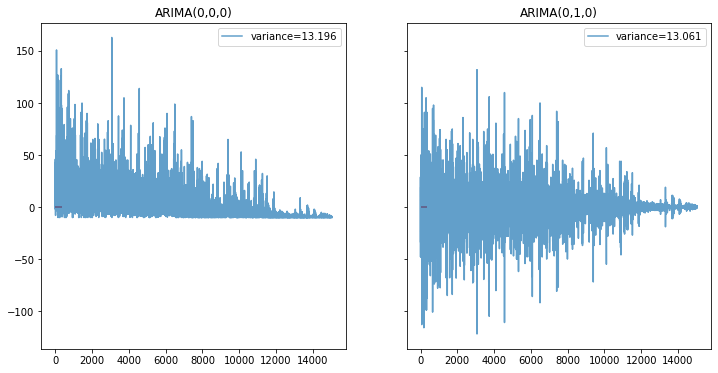

In [ ]:
#We will compare the residuals for two types of Arima models: (000) vs (010)
#our series has autocorrelation out to a high number of lags (from acf plot) so it will need a high order of differencing
#Address_df['1st Max Value']

model = ARIMA(Address_df['S02 Daily Max'], (0, 0, 0))
res_000 = model.fit()
print(res_000.summary())

model = ARIMA(Address_df['S02 Daily Max'], (0, 1, 0))
res_010 = model.fit()
print(res_010.summary())

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
ax[0].plot(res_000.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_000.resid.values)));
ax[0].hlines(0, xmin=0, xmax=350, color='r');
ax[0].set_title("ARIMA(0,0,0)");
ax[0].legend();
ax[1].plot(res_010.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_010.resid.values)));
ax[1].hlines(0, xmin=0, xmax=350, color='r');
ax[1].set_title("ARIMA(0,1,0)");
ax[1].legend();

smaller variance, so we prefer the 010 model

#####010 vs 020

                             ARIMA Model Results                              
Dep. Variable:        D.S02 Daily Max   No. Observations:                15048
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -60020.338
Method:                           css   S.D. of innovations             13.061
Date:                Sun, 12 Dec 2021   AIC                         120044.676
Time:                        19:16:49   BIC                         120059.914
Sample:                             1   HQIC                        120049.731
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0015      0.106     -0.014      0.989      -0.210       0.207
                             ARIMA Model Results                              
Dep. Variable:       D2.S02 Daily Max   No. Observat

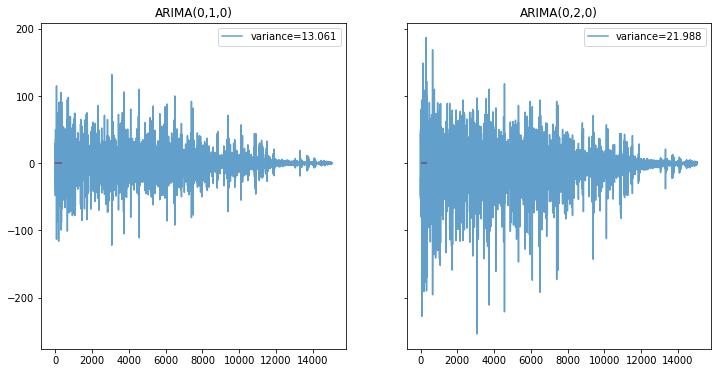

In [ ]:
model = ARIMA(Address_df['S02 Daily Max'], (0, 1, 0))
res_010 = model.fit()
print(res_010.summary())

model = ARIMA(Address_df['S02 Daily Max'], (0, 2, 0))
res_020 = model.fit()
print(res_020.summary())

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
ax[0].plot(res_010.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_010.resid.values)));
ax[0].hlines(0, xmin=0, xmax=350, color='r');
ax[0].set_title("ARIMA(0,1,0)");
ax[0].legend();
ax[1].plot(res_020.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_020.resid.values)));
ax[1].hlines(0, xmin=0, xmax=350, color='r');
ax[1].set_title("ARIMA(0,2,0)");
ax[1].legend();

In [ ]:
#010 has lower variance, bingo!

####optimizing the moving average component





                             ARIMA Model Results                              
Dep. Variable:            D.z_S02_max   No. Observations:                14684
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -23605.787
Method:                           css   S.D. of innovations              1.208
Date:                Wed, 17 Nov 2021   AIC                          47215.573
Time:                        20:29:17   BIC                          47230.762
Sample:                             1   HQIC                         47220.618
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.227e-05      0.010     -0.001      0.999      -0.020       0.020
                             ARIMA Model Results                              
Dep. Variable:            D.z_S02_max   No. Observat

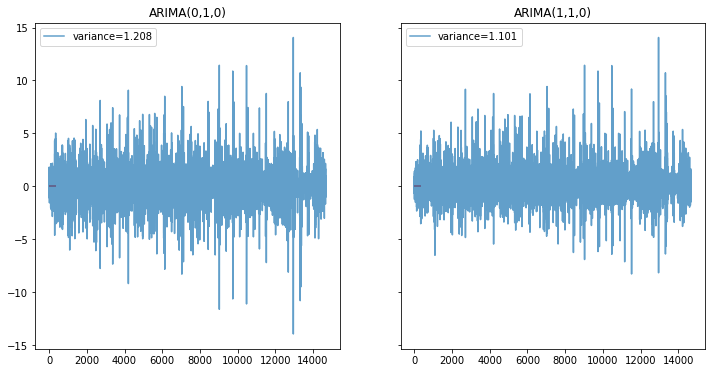

In [ ]:
model = ARIMA(Address_df['S02 Daily Max'].dropna(), (0, 1, 0))
res_010 = model.fit()
print(res_010.summary())

model = ARIMA(Address_df['S02 Daily Max'].dropna(), (1, 1, 0))
res_110 = model.fit()
print(res_110.summary())

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
ax[0].plot(res_010.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_010.resid.values)));
ax[0].hlines(0, xmin=0, xmax=350, color='r');
ax[0].set_title("ARIMA(0,1,0)");
ax[0].legend();
ax[1].plot(res_110.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_110.resid.values)));
ax[1].hlines(0, xmin=0, xmax=350, color='r');
ax[1].set_title("ARIMA(1,1,0)");
ax[1].legend();

In [ ]:
##ARIMA 110 has slightly lower AIC and variance, therefore it is preferable

####optimizing the autoregressive component

                             ARIMA Model Results                              
Dep. Variable:        D.S02 Daily Max   No. Observations:                15048
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -58582.311
Method:                       css-mle   S.D. of innovations             11.871
Date:                Sun, 12 Dec 2021   AIC                         117170.623
Time:                        20:04:08   BIC                         117193.480
Sample:                             1   HQIC                        117178.205
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0021      0.068     -0.030      0.976      -0.136       0.132
ar.L1.D.S02 Daily Max    -0.4171      0.007    -56.297      0.000      -0.432      -0.403
        

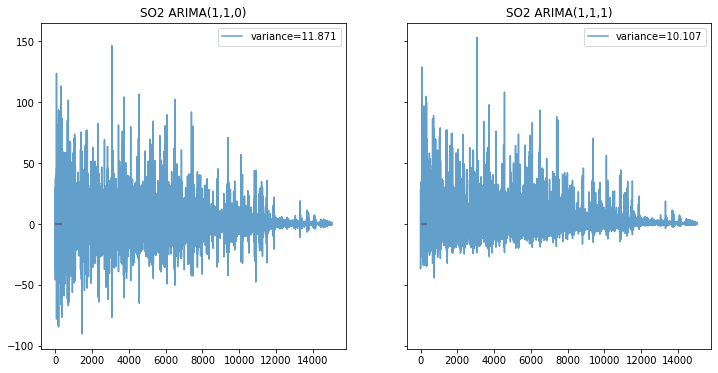

In [ ]:
model = ARIMA(Address_df['S02 Daily Max'].dropna(), (1, 1, 0))
res_110 = model.fit()
print(res_110.summary())

model = ARIMA(Address_df['S02 Daily Max'].dropna(), (1, 1, 1))
res_111 = model.fit()
print(res_111.summary())

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
ax[0].plot(res_110.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_110.resid.values)));
ax[0].hlines(0, xmin=0, xmax=350, color='r');
ax[0].set_title("SO2 ARIMA(1,1,0)");
ax[0].legend();
ax[1].plot(res_111.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_111.resid.values)));
ax[1].hlines(0, xmin=0, xmax=350, color='r');
ax[1].set_title("SO2 ARIMA(1,1,1)");
ax[1].legend();

We see that the (1,1,1) model has slightly lower variance but systematically underestimates the S02 values, for this reason we prefer the (1,1,0 model)

#####111 vs 211

                             ARIMA Model Results                              
Dep. Variable:        D.1st Max Value   No. Observations:                15048
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -56079.490
Method:                       css-mle   S.D. of innovations             10.051
Date:                Mon, 25 Oct 2021   AIC                         112166.980
Time:                        20:13:15   BIC                         112197.456
Sample:                             1   HQIC                        112177.090
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0020      0.004     -0.518      0.605      -0.010       0.006
ar.L1.D.1st Max Value     0.1463      0.009     16.814      0.000       0.129       0.163
ma.L1.D.

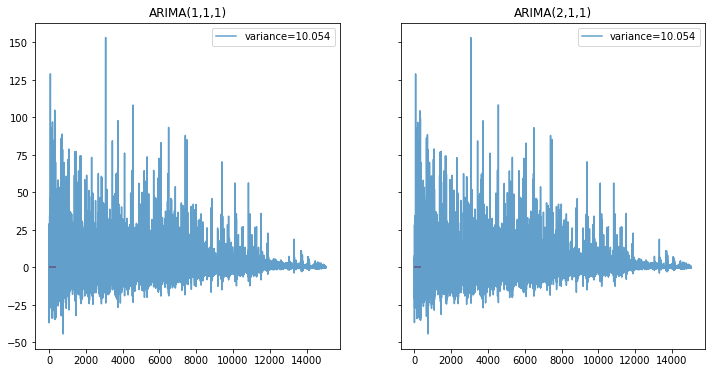

In [ ]:
model = ARIMA(Address_df['S02 Daily Max], (1, 1, 1))
res_111 = model.fit()
print(res_111.summary())

model = ARIMA(Address_df['S02 Daily Max'], (2, 1, 1))
res_211 = model.fit()
print(res_211.summary())

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
ax[0].plot(res_111.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_111.resid.values)));
ax[0].hlines(0, xmin=0, xmax=350, color='r');
ax[0].set_title("ARIMA(1,1,1)");
ax[0].legend();
ax[1].plot(res_211.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_211.resid.values)));
ax[1].hlines(0, xmin=0, xmax=350, color='r');
ax[1].set_title("ARIMA(2,1,1)");
ax[1].legend();

Essentially no difference here, so lets stick with Arima(1,1,1) as our preferred model

####plotting predictions

In [ ]:
#df = State_df[State_df['Address']== 'HILLMAN STATE PARK - KINGS CREEK ROAD']
#df.shape

(14721, 30)

In [ ]:
df = S02_df[S02_df['Address']== '520 Orchard Ave, Avalon, PA 15202 (Avalon)']


df = df.groupby('Date').first().reset_index()

#reset index to begin at 0 and go to 15k, necessary for forecasting in the next cell
df.reset_index(inplace=True)
df.set_index('Date', inplace=True)
df = df[['S02 Daily Max',  'Address']]
df['z_S02_max'] = (df['S02 Daily Max'] - df['S02 Daily Max'].rolling(window=365).mean()) / df['S02 Daily Max'].rolling(window=365).std()
#365 lag differenced and detrended
df['z_S02_differenced'] = df['z_S02_max'] - df['z_S02_max'].shift(365)
df
#df1 = df[['z_S02_max']]
#df1.dropna()

,S02 Daily Max,Address,z_S02_max,z_S02_differenced
Date,,,,
2000-01-01,23.0,"520 Orchard Ave, Avalon, PA 15202 (Avalon)",NaN,NaN
2000-01-02,51.0,"520 Orchard Ave, Avalon, PA 15202 (Avalon)",NaN,NaN
2000-01-03,56.0,"520 Orchard Ave, Avalon, PA 15202 (Avalon)",NaN,NaN
2000-01-04,8.0,"520 Orchard Ave, Avalon, PA 15202 (Avalon)",NaN,NaN
2000-01-05,10.0,"520 Orchard Ave, Avalon, PA 15202 (Avalon)",NaN,NaN
...,...,...,...,...
2020-10-29,0.0,"520 Orchard Ave, Avalon, PA 15202 (Avalon)",-0.727756,-0.337090
2020-10-30,0.0,"520 Orchard Ave, Avalon, PA 15202 (Avalon)",-0.727756,-0.337090
2020-10-31,0.0,"520 Orchard Ave, Avalon, PA 15202 (Avalon)",-0.727756,-0.338671


In [ ]:
df['S02 Daily Max']

Model RMSE: 1.7941637017049903


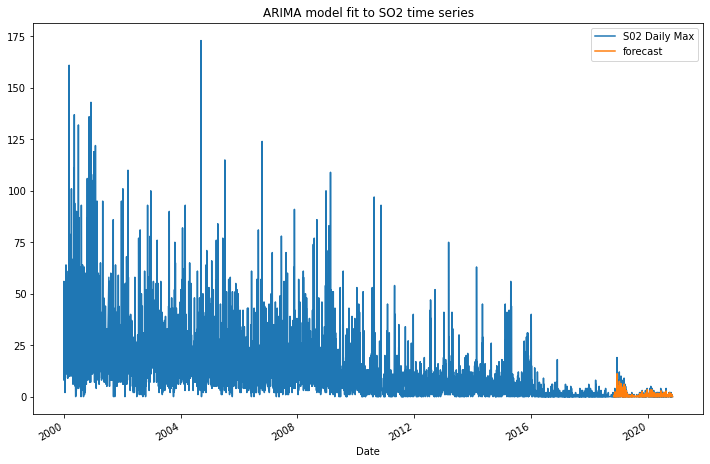

In [ ]:
model = ARIMA(df['S02 Daily Max'], (1, 1, 0))
res_110 = model.fit()
fig, ax = plt.subplots(figsize=(12, 8))

#calculating rmse
yhat =res_110.predict(6797,7526)
y = df['S02 Daily Max'][6797:]
se = np.square(yhat - y)
mse = np.mean(se)
rmse = np.sqrt(mse)
print("Model RMSE:",rmse)

df['S02 Daily Max'].plot(ax=ax);
plt.title("ARIMA model fit to SO2 time series")
ax = res_110.plot_predict(6797,7526 , dynamic=False, plot_insample=False, ax=ax);

Model RMSE: 1.7941637017049903


In [ ]:
yhat =res_110.predict(6797,7526)
yhat

6796   -0.223421
6797    0.223694
6798   -0.223460
6799    0.000418
6800    0.223131
          ...   
7521   -0.000131
7522   -0.000131
7523   -0.000131
7524   -0.000131
7525   -0.000131
Length: 730, dtype: float64

Visually, it appears the model does fairly well in predicing daily max sulfur dioxide. In order to compare it's accuracy to future ML models we will build, we ask how often it correctly predicts days on which daily S02 is greater than the median value. 

##New Section